# Function Testing Notebook - Joseph

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import logging
import sys
from pathlib import Path

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn.objects as so
from okabeito import black, blue, green, lightblue, orange, purple, red, yellow
from seaborn import axes_style


In [ ]:
from neurodent import constants, core, visualization

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tempdir = Path('../../tmp').resolve()
print(tempdir)
core.set_temp_directory(tempdir)

/mnt/isilon/marsh_single_unit/PythonEEG/tmp


In [4]:
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.WARNING, stream=sys.stdout, force=True)
logger = logging.getLogger()

In [ ]:
# df = pd.read_pickle("/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/examples/alphadelta_avg_delta_alpha.pkl")
# df = pd.read_pickle("/mnt/isilon/marsh_single_unit/PythonEEG/notebooks/examples/alphadelta_avg_delta_alpha_minimally_filtered.pkl")
df = pd.read_pickle("/mnt/isilon/marsh_single_unit/NeuRodent/notebooks/examples/alphadelta_avg_delta_alpha_rms.pkl")
df

animal genotype  \
0      032221_cohort 2, Group 3, Mouse 6 Cage 2A Re-...     FHet   
1      032221_cohort 2, Group 3, Mouse 6 Cage 2A Re-...     FHet   
2      032221_cohort 2, Group 3, Mouse 6 Cage 2A Re-...     FHet   
3      032221_cohort 2, Group 3, Mouse 6 Cage 2A Re-...     FHet   
4      032221_cohort 2, Group 3, Mouse 6 Cage 2A Re-...     FHet   
...                                                 ...      ...   
1386                 090122_group4_2mice_FMut_MMut MMUT     MMut   
1387                 090122_group4_2mice_FMut_MMut MMUT     MMut   
1388                 090122_group4_2mice_FMut_MMut MMUT     MMut   
1389                 090122_group4_2mice_FMut_MMut MMUT     MMut   
1390                 090122_group4_2mice_FMut_MMut MMUT     MMut   

      total_minutes  alphadelta     delta     alpha    logrms    zpcorr  
0               0.0    0.885032  7.742151  6.805393  4.594639  1.536006  
1              60.0    0.830544  8.048762  6.628893  4.566296  1.362506  
2             120.0    0.876248  7.789131  6.775955  4.587793  1.514958  
3             180.0    0.829857  8.030031  6.606911  4.549557  1.367657  
4             240.0    0.842078  7.825662  6.531685  4.512875  1.356645  
...             ...         ...       ...       ...       ...       ...  
1386         1140.0    0.846109  7.803573  6.579470  4.542708  1.606084  
1387         1200.0    0.851458  7.995966  6.786025  4.581319  1.601268  
1388         1260.0    0.847541  7.882313  6.657563  4.560960  1.607005  
1389         1320.0    0.847623  7.982861  6.741375  4.563651  1.594613  
1390         1380.0    0.850385  7.742233  6.555932  4.537876  1.606027  

[1391 rows x 8 columns]

In [6]:
df = df.reset_index(drop=False)
df["sex"] = df["genotype"].str[0]
df["sex"] = df["sex"].map({"F": "Female", "M": "Male"})
df["genotype"] = df["genotype"].str[1:]
df['total_minutes'] = (df['total_minutes'] - 6 * 60) % 1440
for feature in ['alphadelta', 'delta', 'alpha', 'logrms', 'zpcorr']:
    df[f"{feature}_nobase"] = (
        df.groupby(["animal", "genotype", "sex"])
        .apply(lambda g: g[feature] - g.loc[(g["total_minutes"] <= 12 * 60), feature].mean())
        .reset_index(level=[0, 1, 2], drop=True)
    )
# Create a copy of df with shifted total_minutes
df2 = df.copy()
df2['total_minutes'] = df2['total_minutes'] + 1440

# Concatenate original and shifted dataframes
df = pd.concat([df, df2], ignore_index=True)

# Create genotype order mapping
genotype_order = {'WT': 0, 'Het': 1, 'Mut': 2}
df['genotype_order'] = df['genotype'].map(genotype_order)

# Create sex order mapping (Male first, then Female)
sex_order = {'Male': 0, 'Female': 1}
df['sex_order'] = df['sex'].map(sex_order)

# Sort by sex first, then genotype
df = df.sort_values(['sex_order', 'genotype_order'])

# Drop the temporary ordering columns
df = df.drop(['genotype_order', 'sex_order'], axis=1)


df

/tmp/ipykernel_3885370/1730269078.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[feature] - g.loc[(g["total_minutes"] <= 12 * 60), feature].mean())
/tmp/ipykernel_3885370/1730269078.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[feature] - g.loc[(g["total_minutes"] <= 12 * 60), feature].mean())
/tmp/ipykernel_3885370/1730269078.py:9: FutureWarning: DataFrameGroupBy.appl

index                                    animal genotype  total_minutes  \
48       48  010822_cohort4_group2_2mice_MWT_MHET M10       WT         1080.0   
49       49  010822_cohort4_group2_2mice_MWT_MHET M10       WT         1140.0   
50       50  010822_cohort4_group2_2mice_MWT_MHET M10       WT         1200.0   
51       51  010822_cohort4_group2_2mice_MWT_MHET M10       WT         1260.0   
52       52  010822_cohort4_group2_2mice_MWT_MHET M10       WT         1320.0   
...     ...                                       ...      ...            ...   
2753   1362        090122_group4_2mice_FMut_MMut FMUT      Mut         2220.0   
2754   1363        090122_group4_2mice_FMut_MMut FMUT      Mut         2280.0   
2755   1364        090122_group4_2mice_FMut_MMut FMUT      Mut         2340.0   
2756   1365        090122_group4_2mice_FMut_MMut FMUT      Mut         2400.0   
2757   1366        090122_group4_2mice_FMut_MMut FMUT      Mut         2460.0   

      alphadelta     delta     alpha    logrms    zpcorr     sex  \
48      0.893610  6.850071  6.050636  4.188447  1.459195    Male   
49      0.868472  7.077492  6.083247  4.180992  1.414982    Male   
50      0.870882  7.094375  6.127301  4.176073  1.421476    Male   
51      0.903151  6.923946  6.169175  4.187233  1.437556    Male   
52      0.881722  6.861031  5.999675  4.179970  1.453461    Male   
...          ...       ...       ...       ...       ...     ...   
2753    0.831034  7.736828  6.384997  4.531547  1.454947  Female   
2754    0.835358  7.791923  6.465311  4.577878  1.479368  Female   
2755    0.831221  7.856846  6.484916  4.533428  1.456651  Female   
2756    0.843904  7.742381  6.481481  4.528586  1.461816  Female   
2757    0.838976  7.828026  6.517544  4.508833  1.451290  Female   

      alphadelta_nobase  delta_nobase  alpha_nobase  logrms_nobase  \
48             0.033797     -0.217050      0.026336      -0.017880   
49             0.008659      0.010371      0.058948      -0.025334   
50             0.011069      0.027254      0.103002      -0.030254   
51             0.043337     -0.143176      0.144875      -0.019094   
52             0.021908     -0.206091     -0.024625      -0.026356   
...                 ...           ...           ...            ...   
2753           0.027653     -0.047533      0.155894       0.093190   
2754           0.031977      0.007561      0.236208       0.139521   
2755           0.027840      0.072484      0.255813       0.095071   
2756           0.040523     -0.041980      0.252378       0.090229   
2757           0.035596      0.043664      0.288441       0.070476   

      zpcorr_nobase  
48        -0.007562  
49        -0.051775  
50        -0.045281  
51        -0.029201  
52        -0.013296  
...             ...  
2753      -0.014308  
2754       0.010113  
2755      -0.012605  
2756      -0.007439  
2757      -0.017965  

[2782 rows x 15 columns]

In [7]:
# Get stats for number of unique animals by genotype and sex
animal_counts = df.groupby(['genotype', 'sex'])['animal'].nunique()
print("\nNumber of unique animals by genotype and sex:")
print(animal_counts)
print("\nTotal number of unique animals:", df['animal'].nunique())



Number of unique animals by genotype and sex:
genotype  sex   
Het       Female    12
          Male       9
Mut       Female    10
          Male      12
WT        Female     6
          Male      13
Name: animal, dtype: int64

Total number of unique animals: 62


In [8]:
feature_to_label = {
    'logrms' : "Log(RMS)",
    'alphadelta' : "Alpha/Delta ratio",
    'delta' : "Log Delta band power",
    'alpha' : "Log Alpha band power",
    'logrms_nobase' : "Log(RMS) - Baseline",
    'alphadelta_nobase' : "Alpha/Delta ratio - Baseline",
    'delta_nobase' : "Log Delta band power - Baseline",
    'alpha_nobase' : "Log Alpha band power - Baseline",
    'zpcorr' : "Z-transformed PCC",
    'zpcorr_nobase' : "Z-transformed PCC - Baseline",
}

In [9]:
import os
save_folder = '/home/dongjp/Downloads/8-26 ep ZT'
save_files = True
save_folder = Path(save_folder)
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
display(save_folder)

PosixPath('/home/dongjp/Downloads/8-26 ep ZT')

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


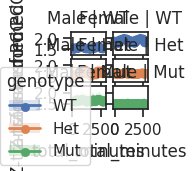

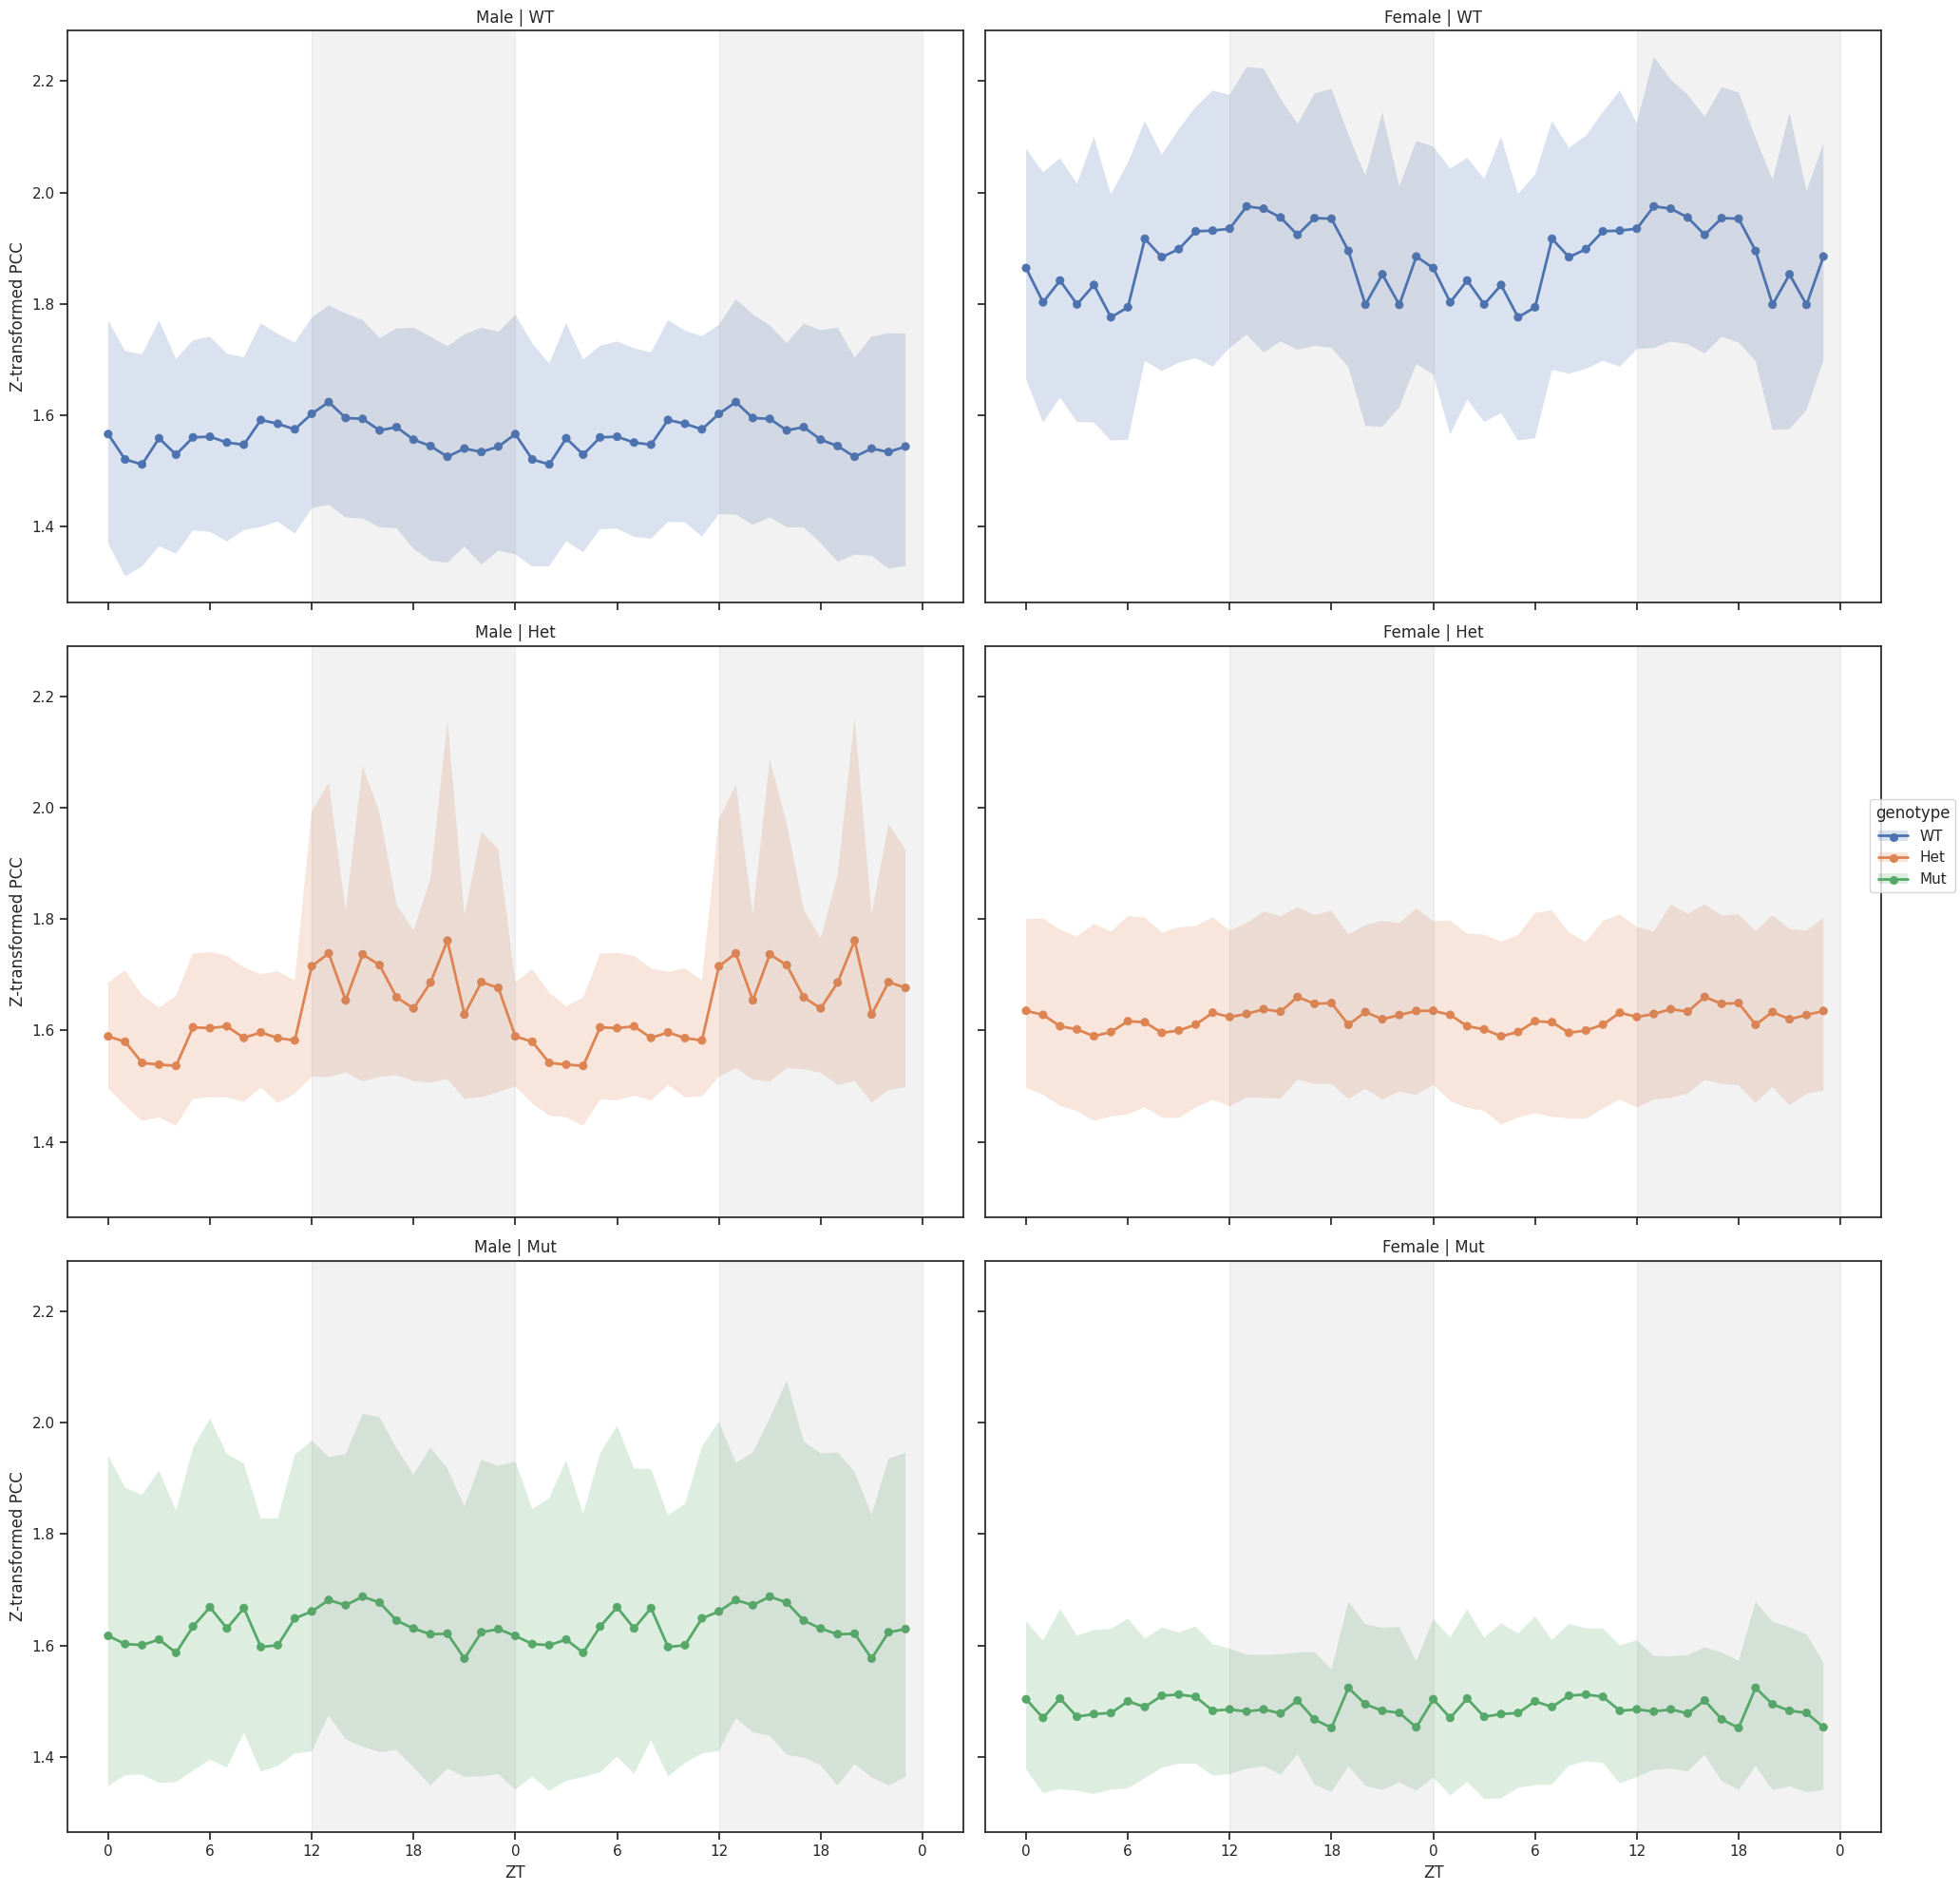

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


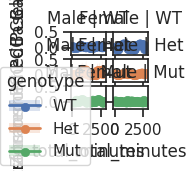

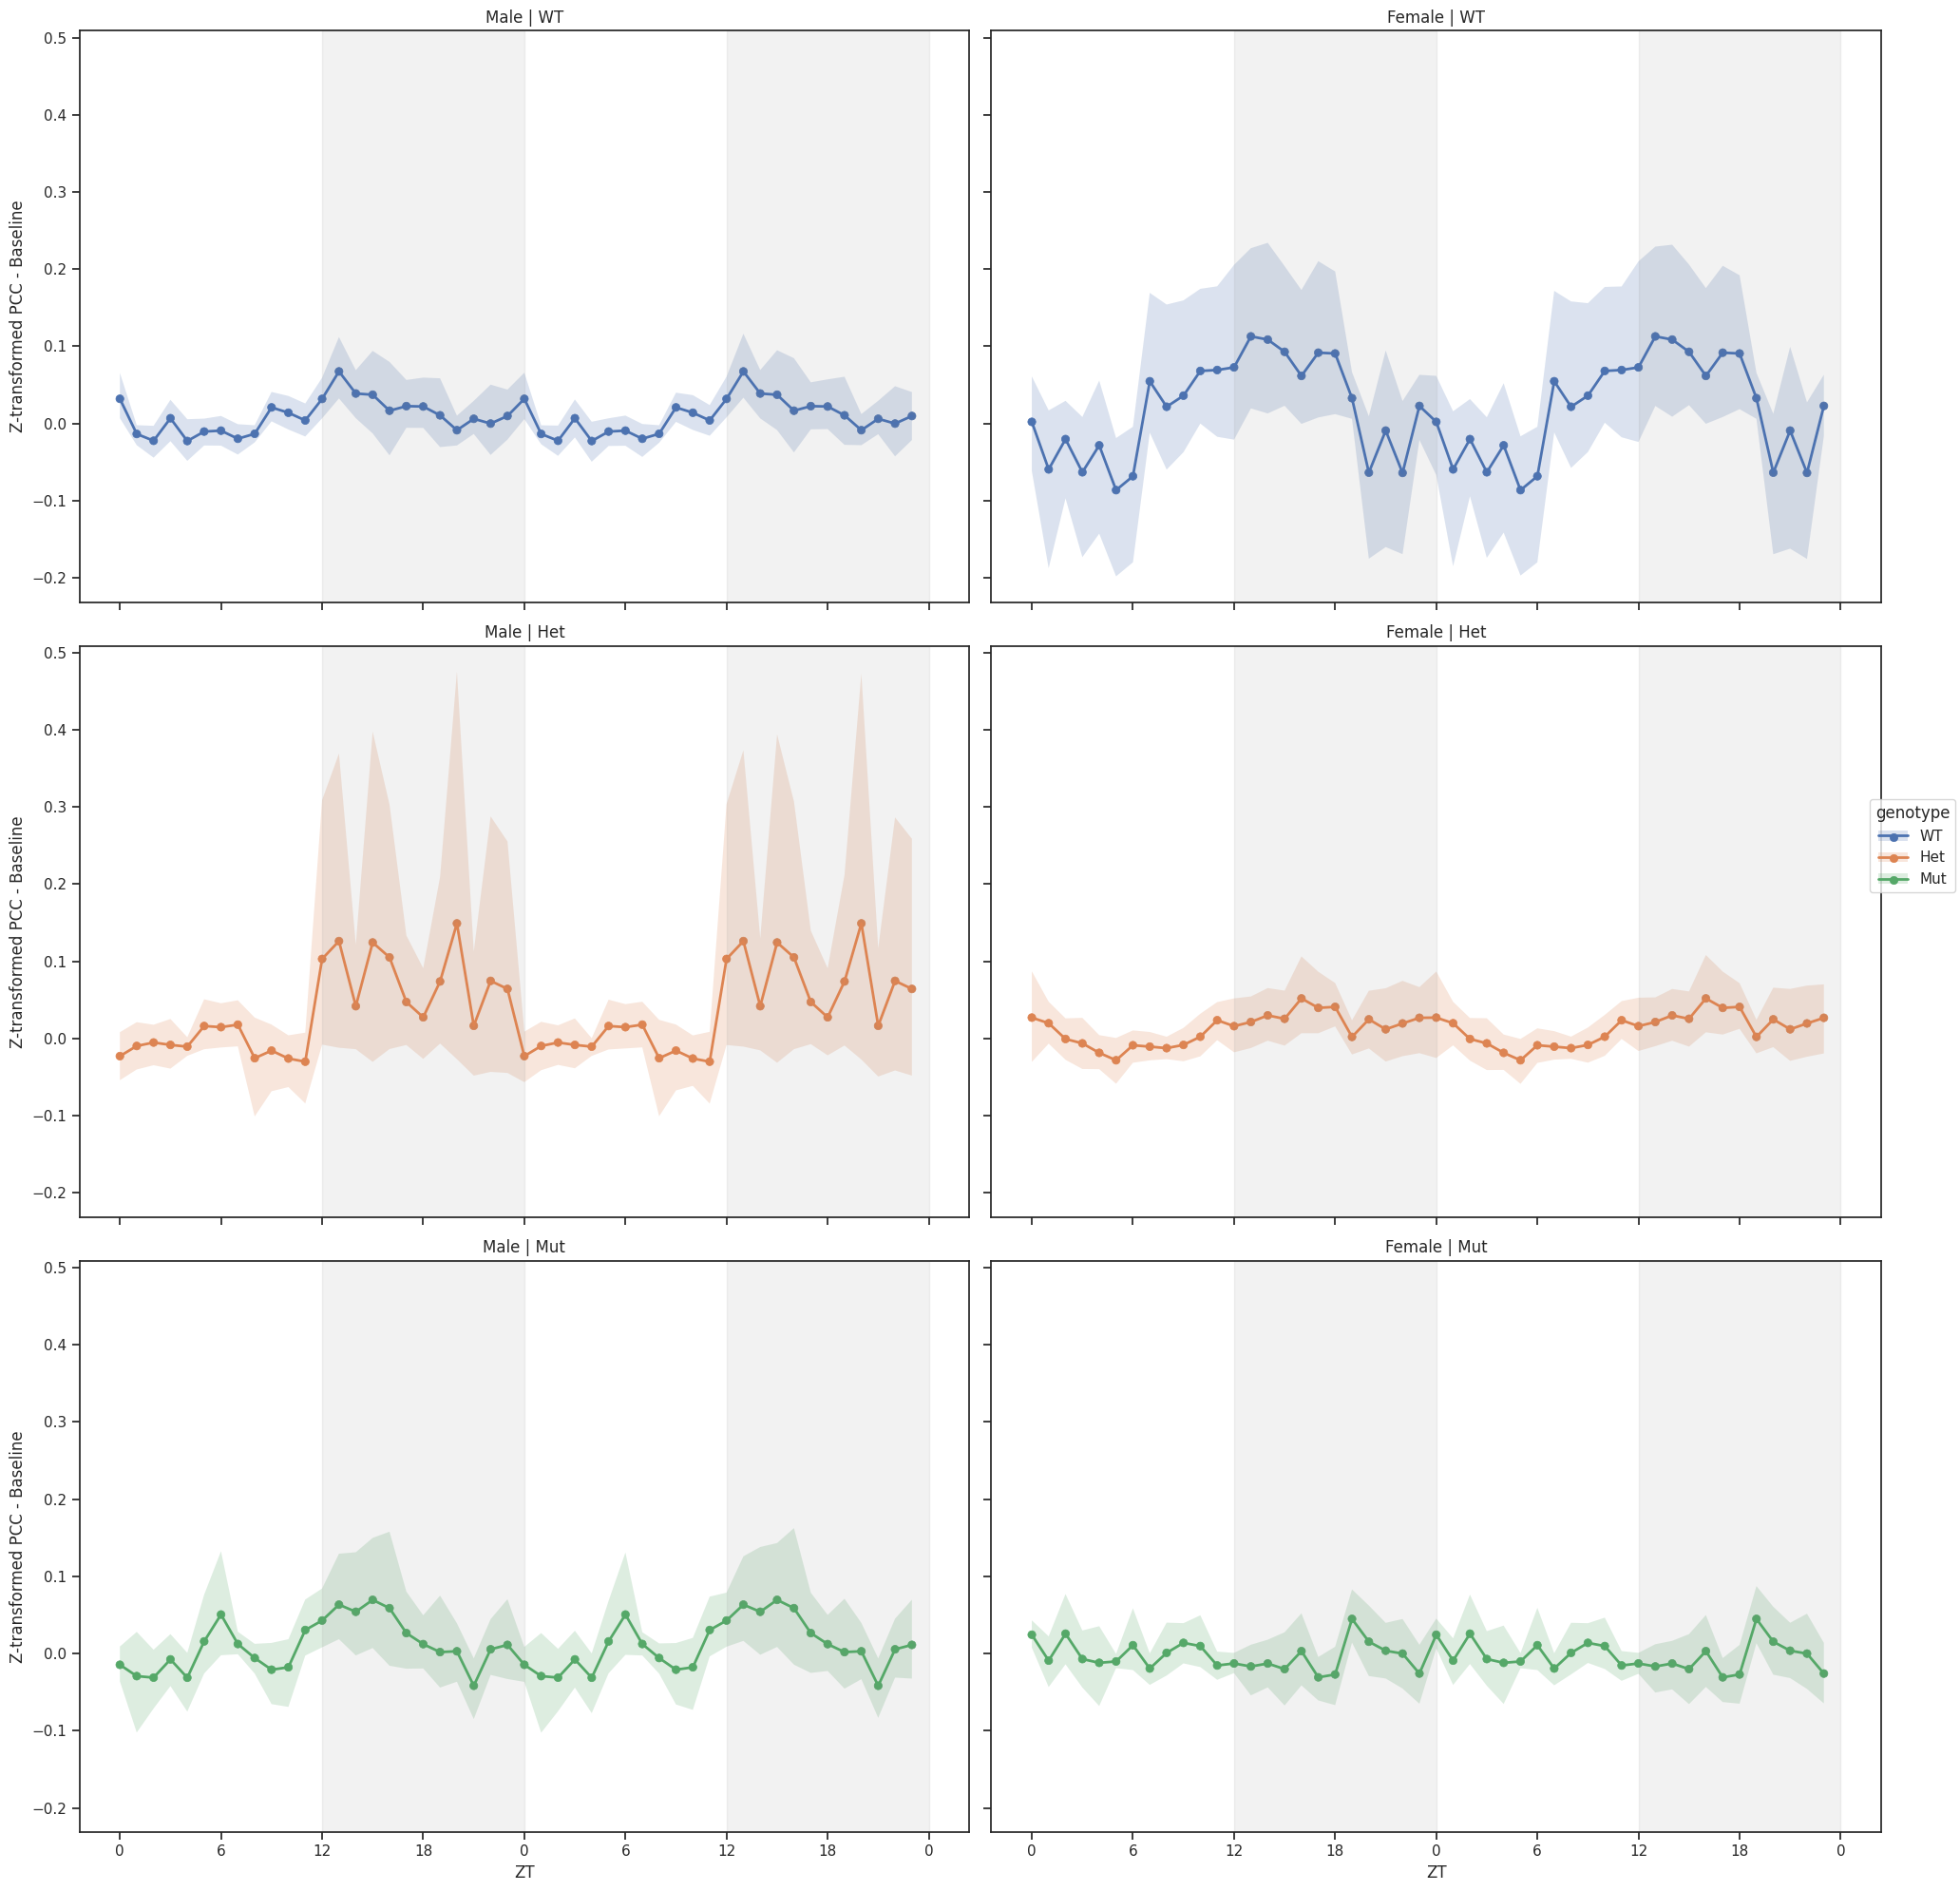

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


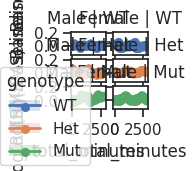

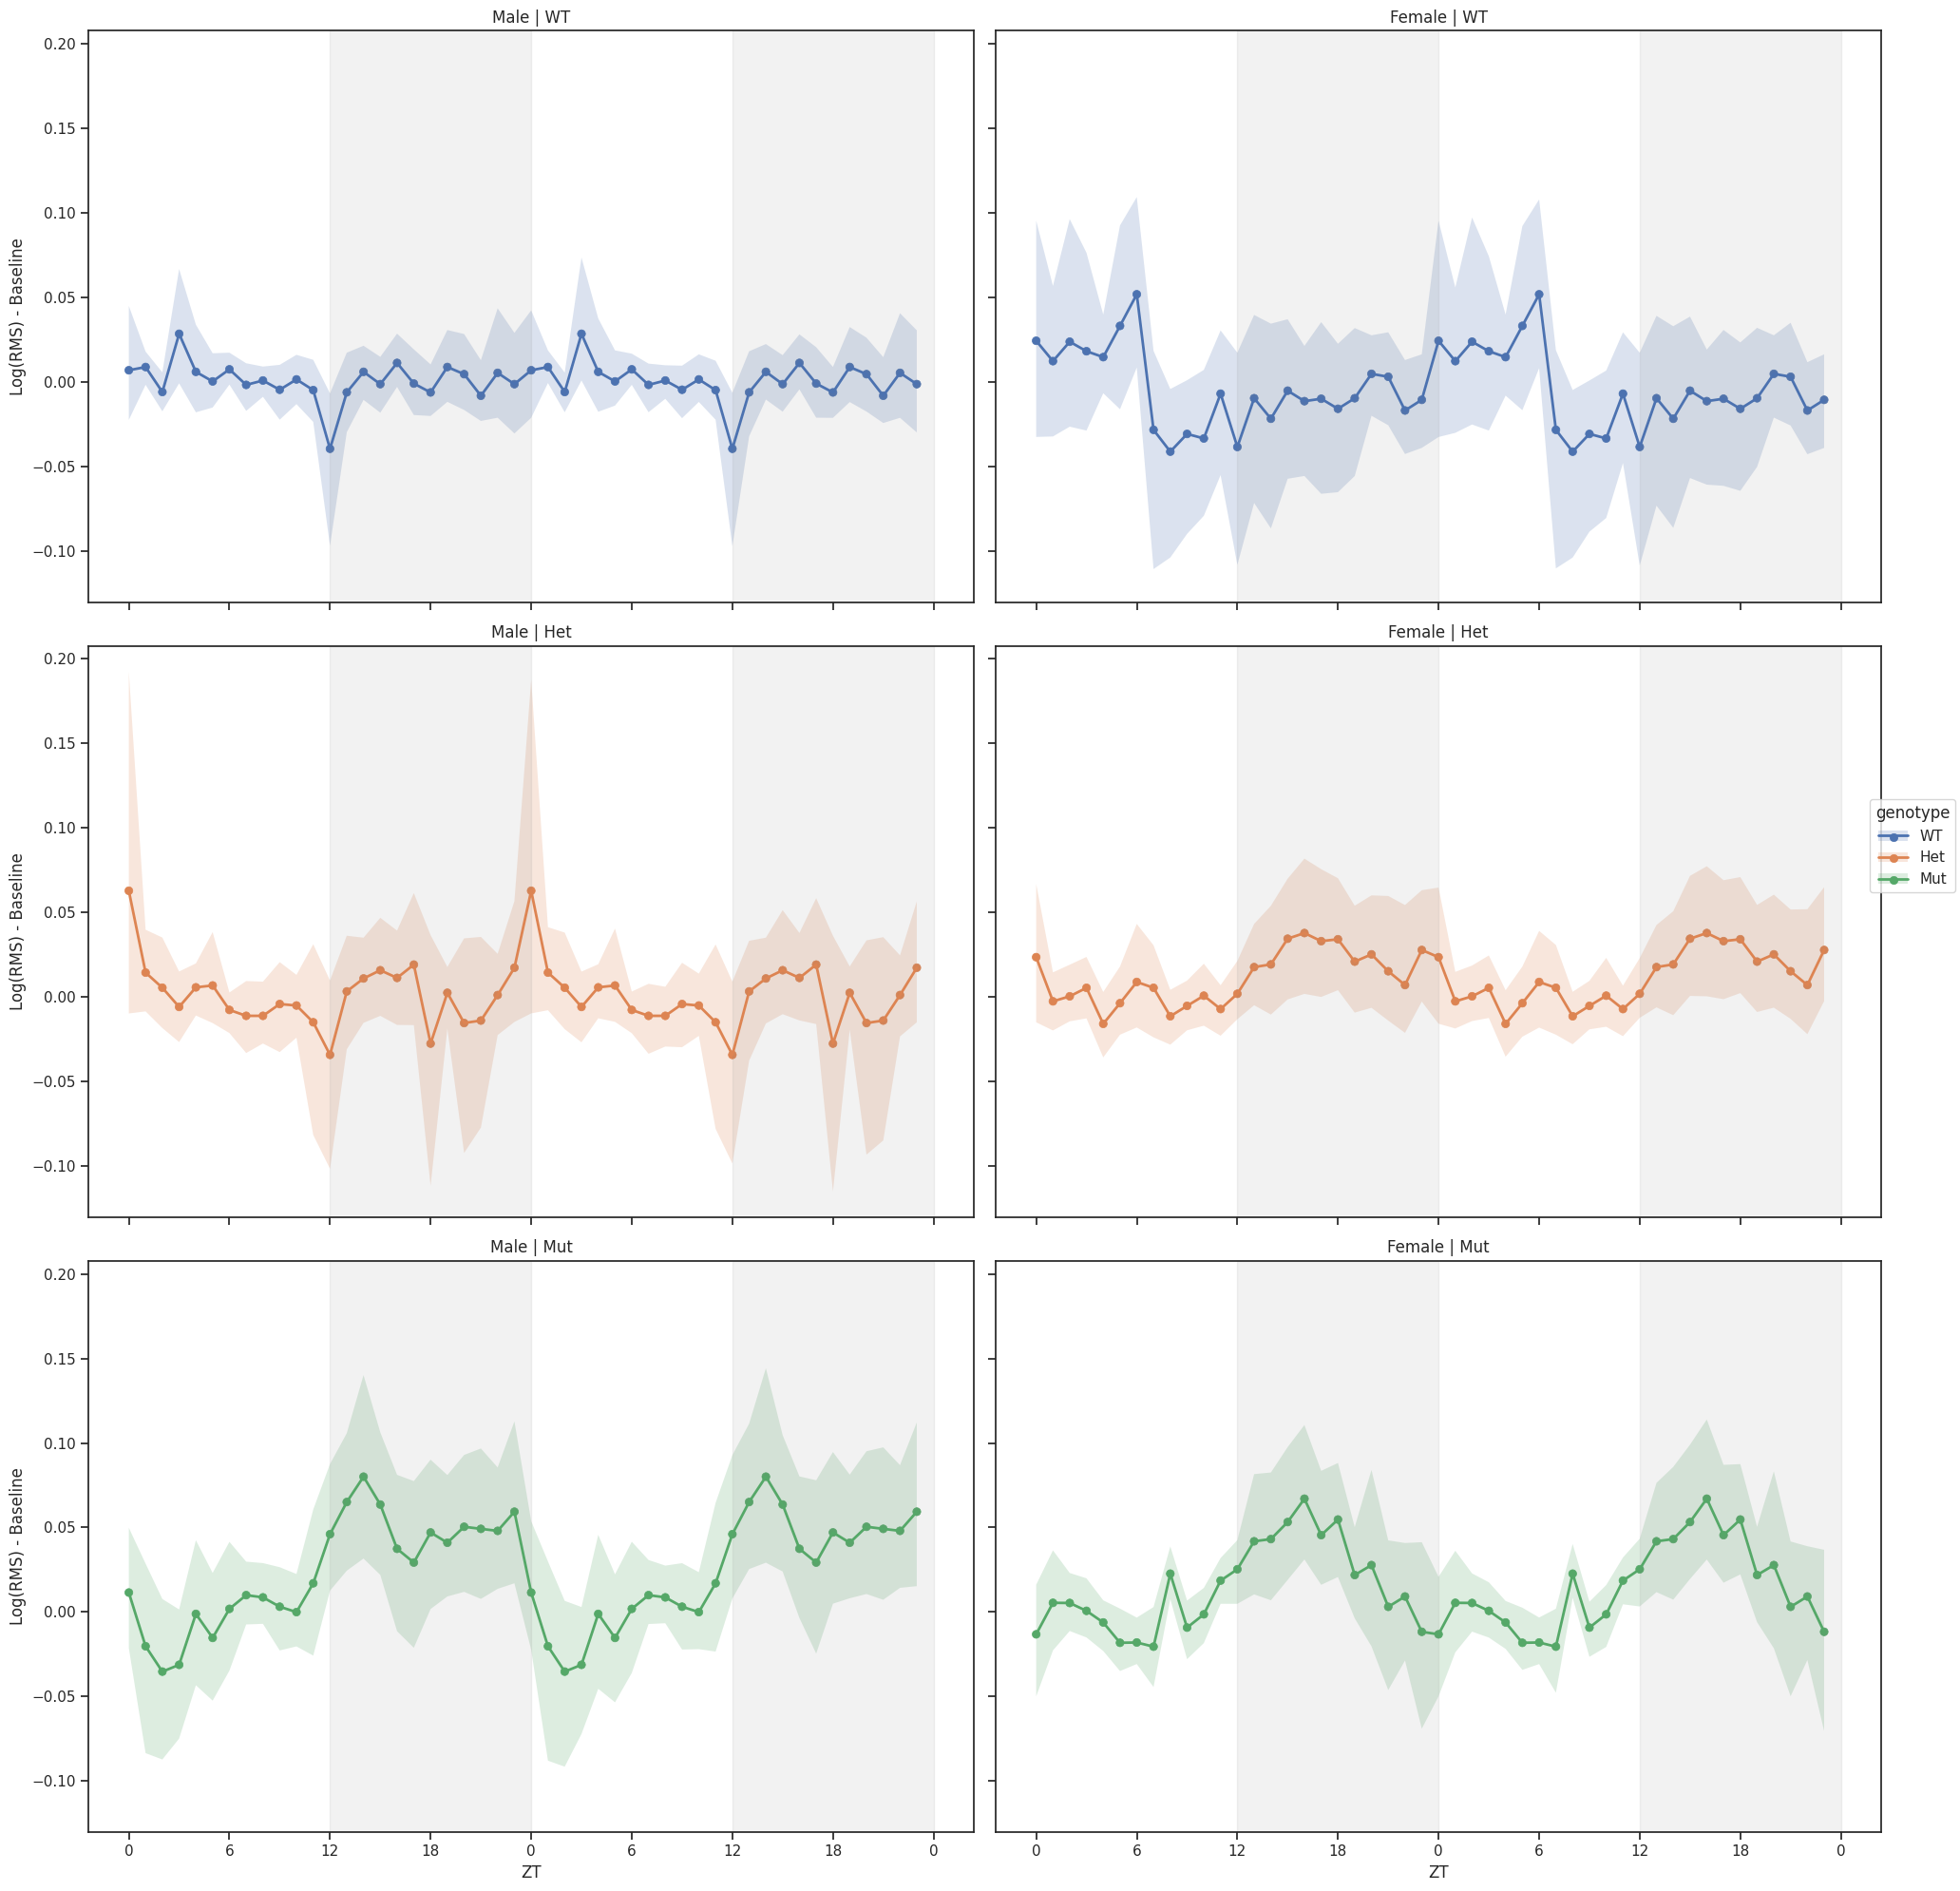

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


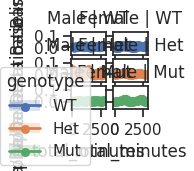

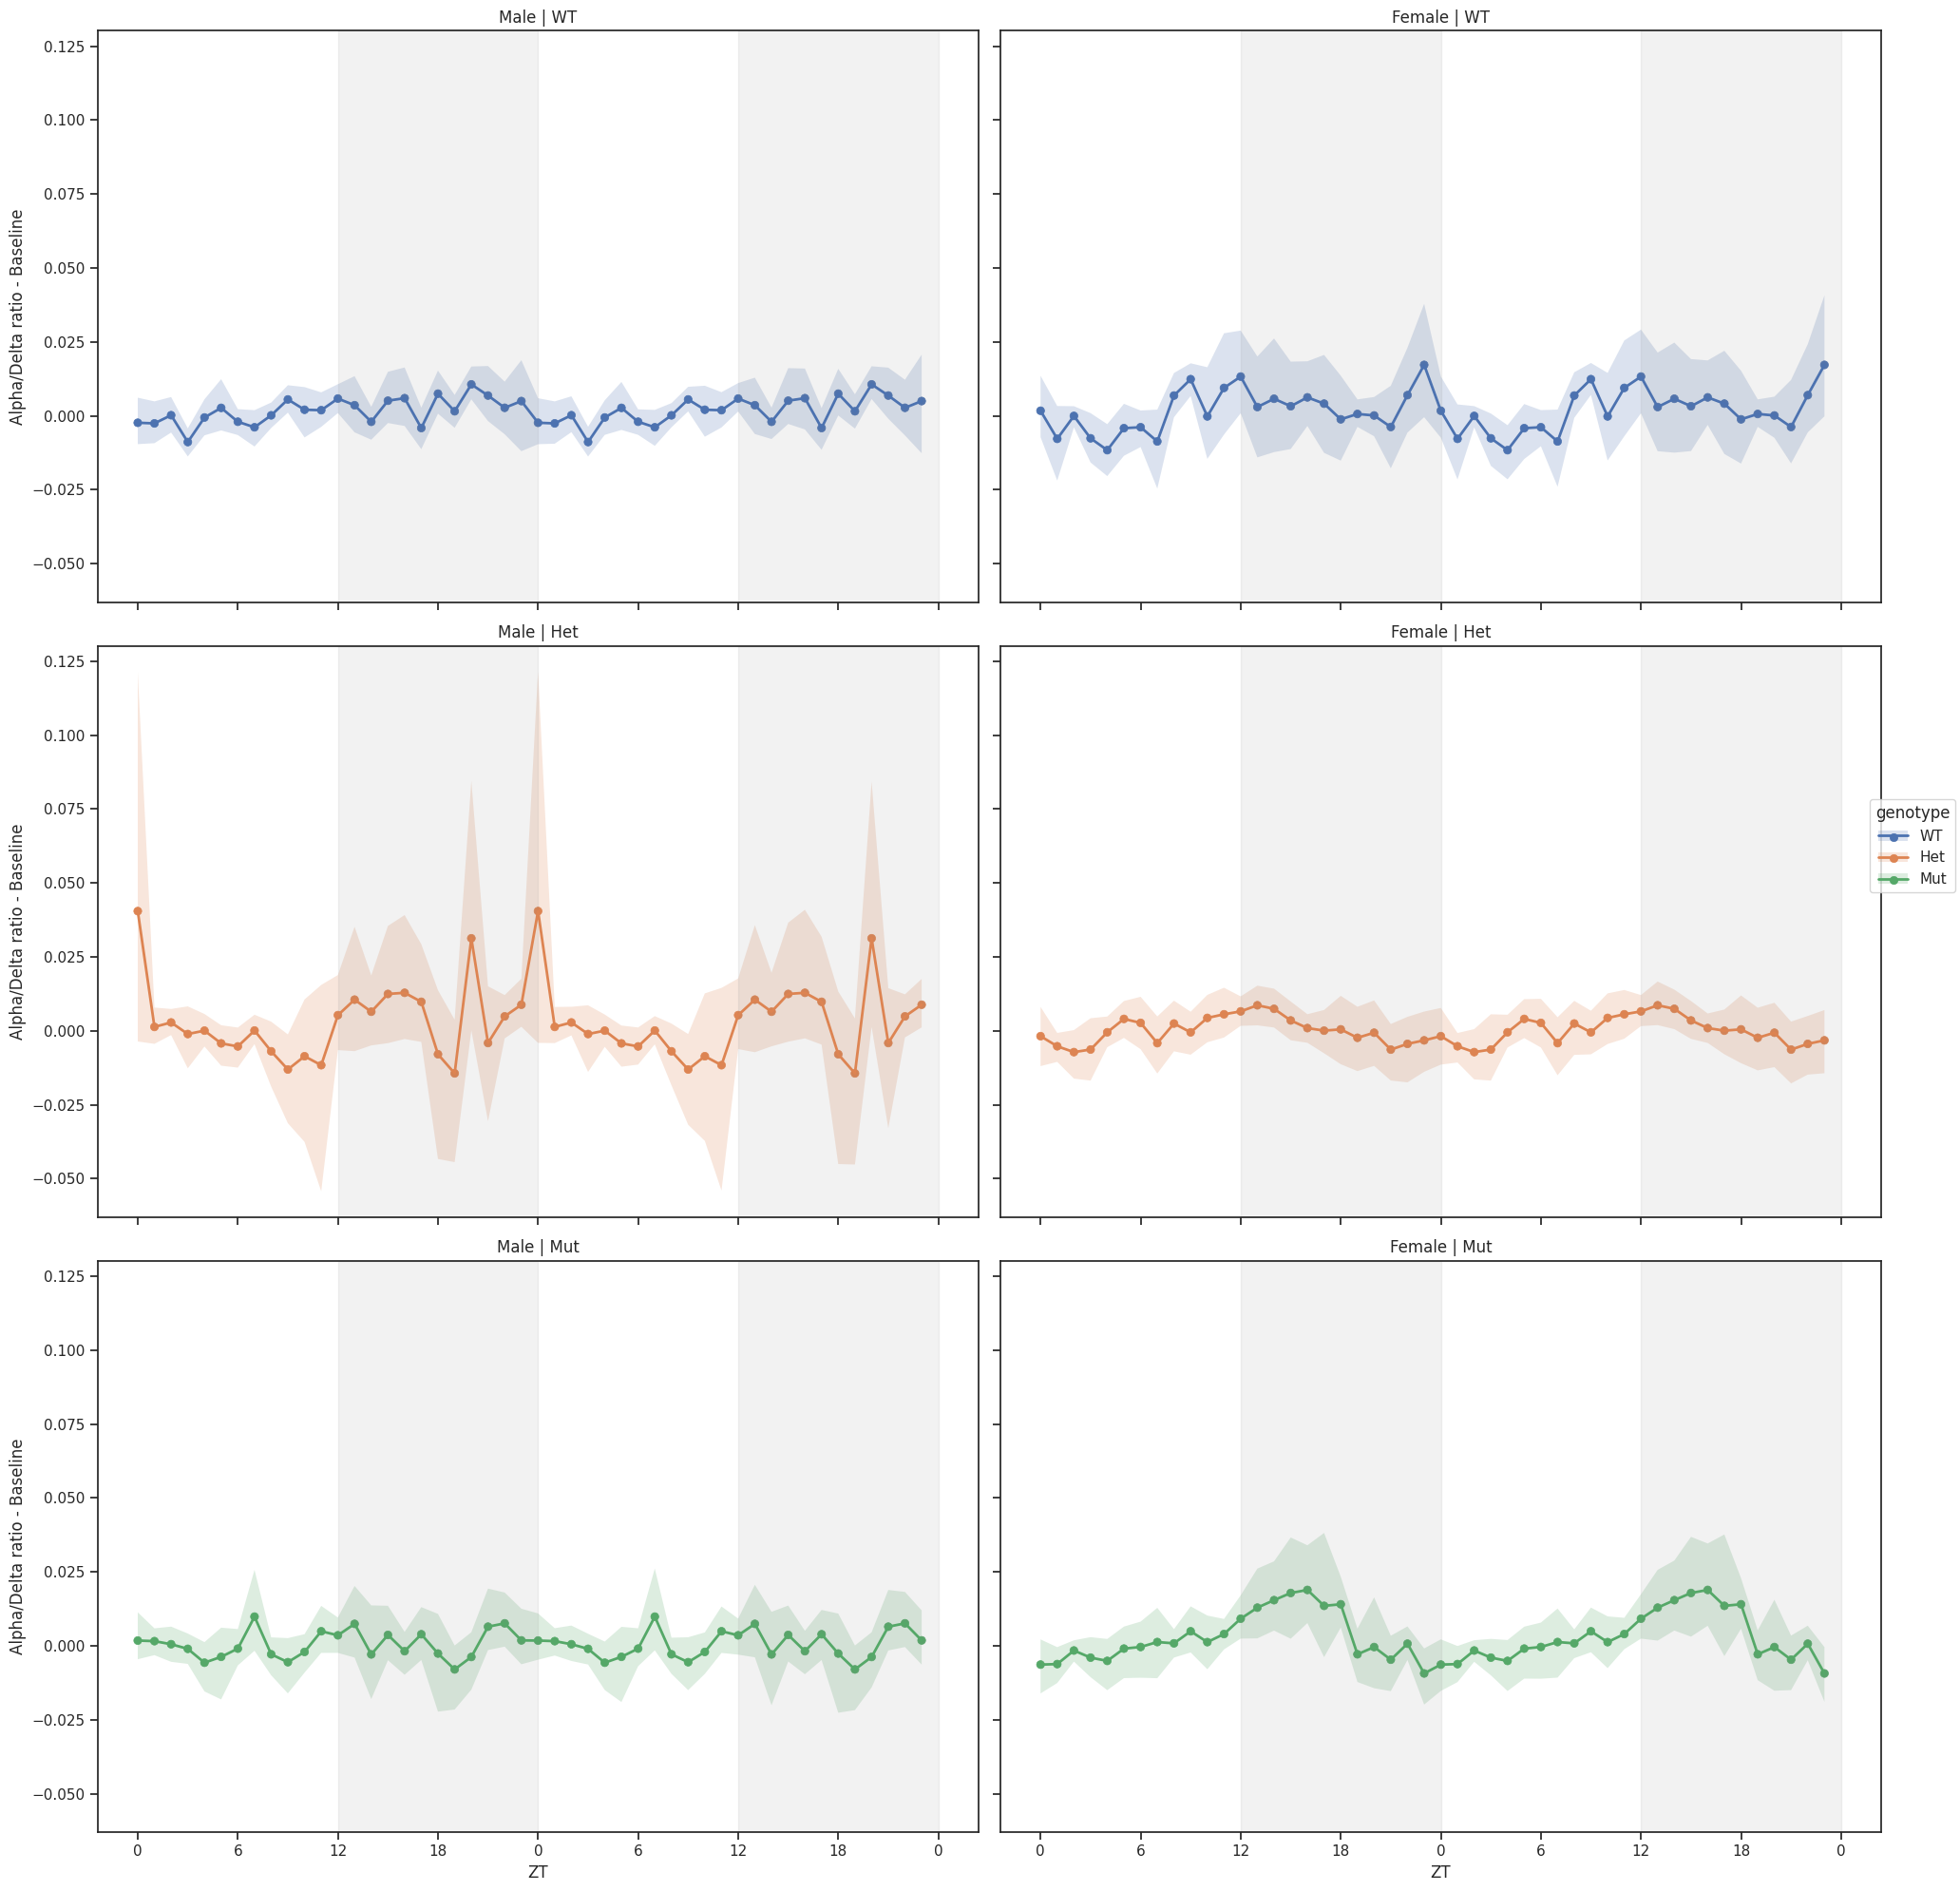

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


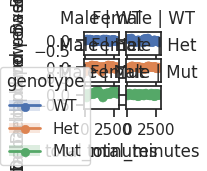

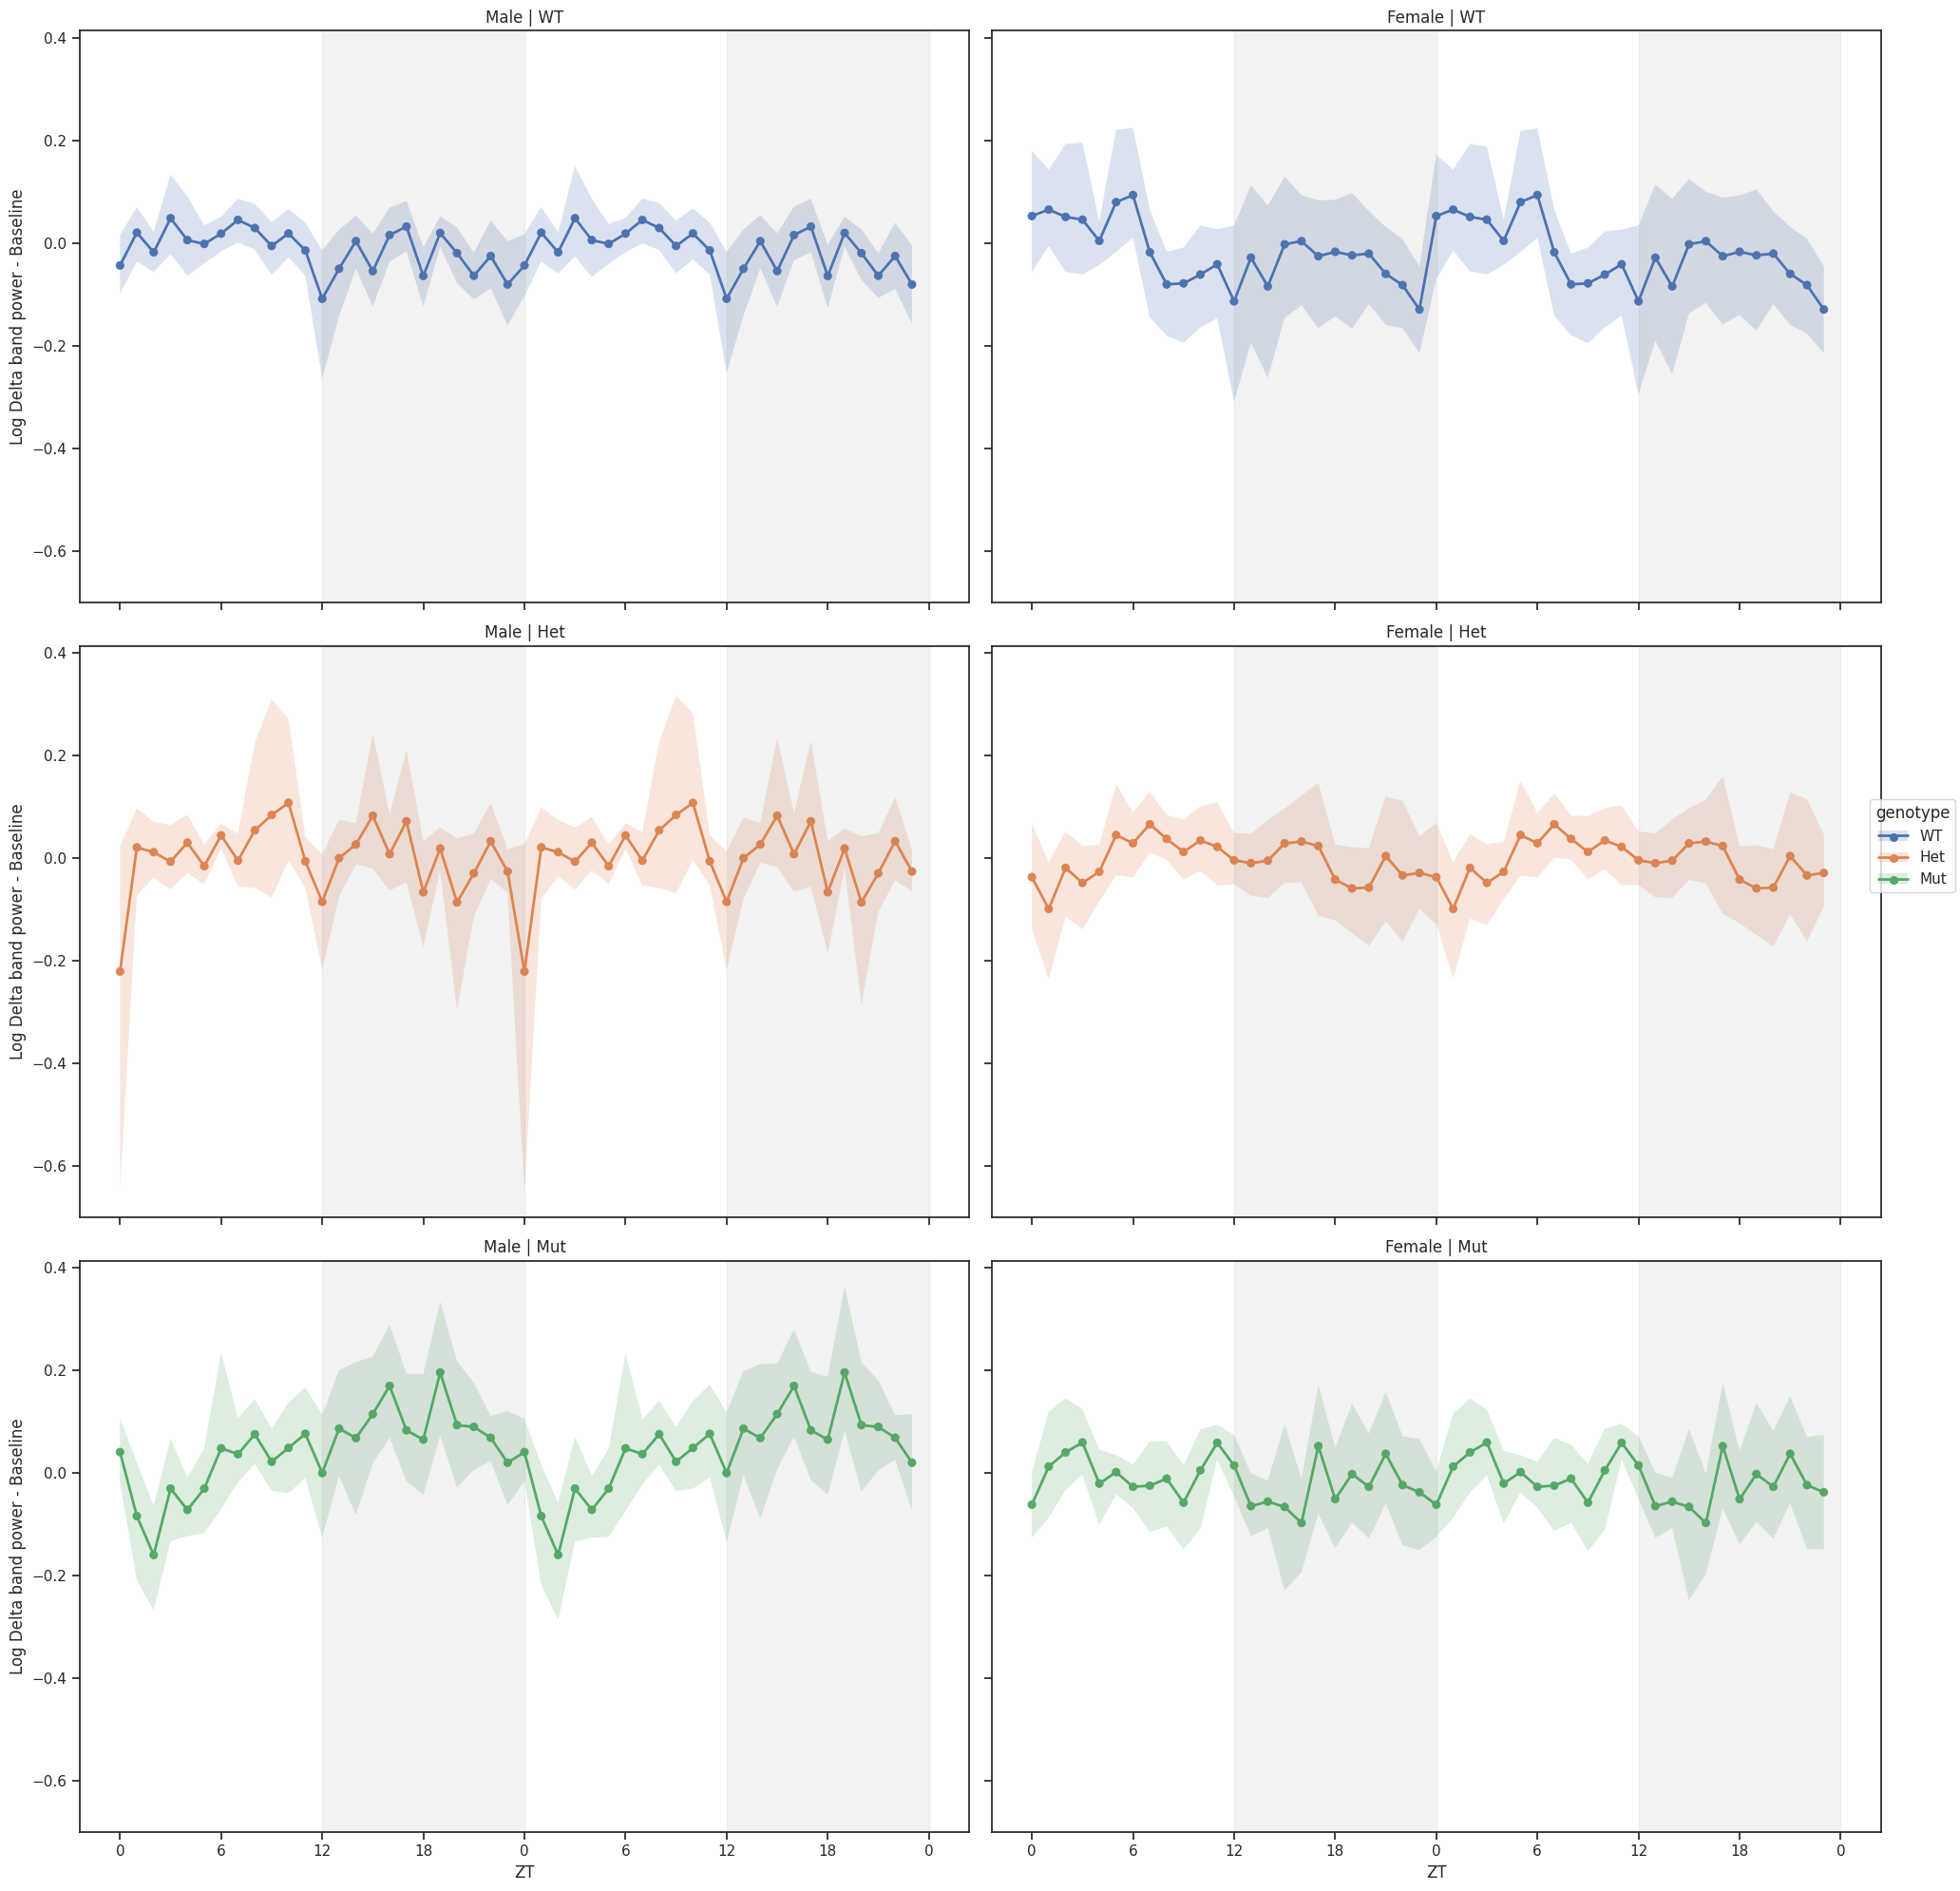

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


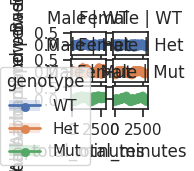

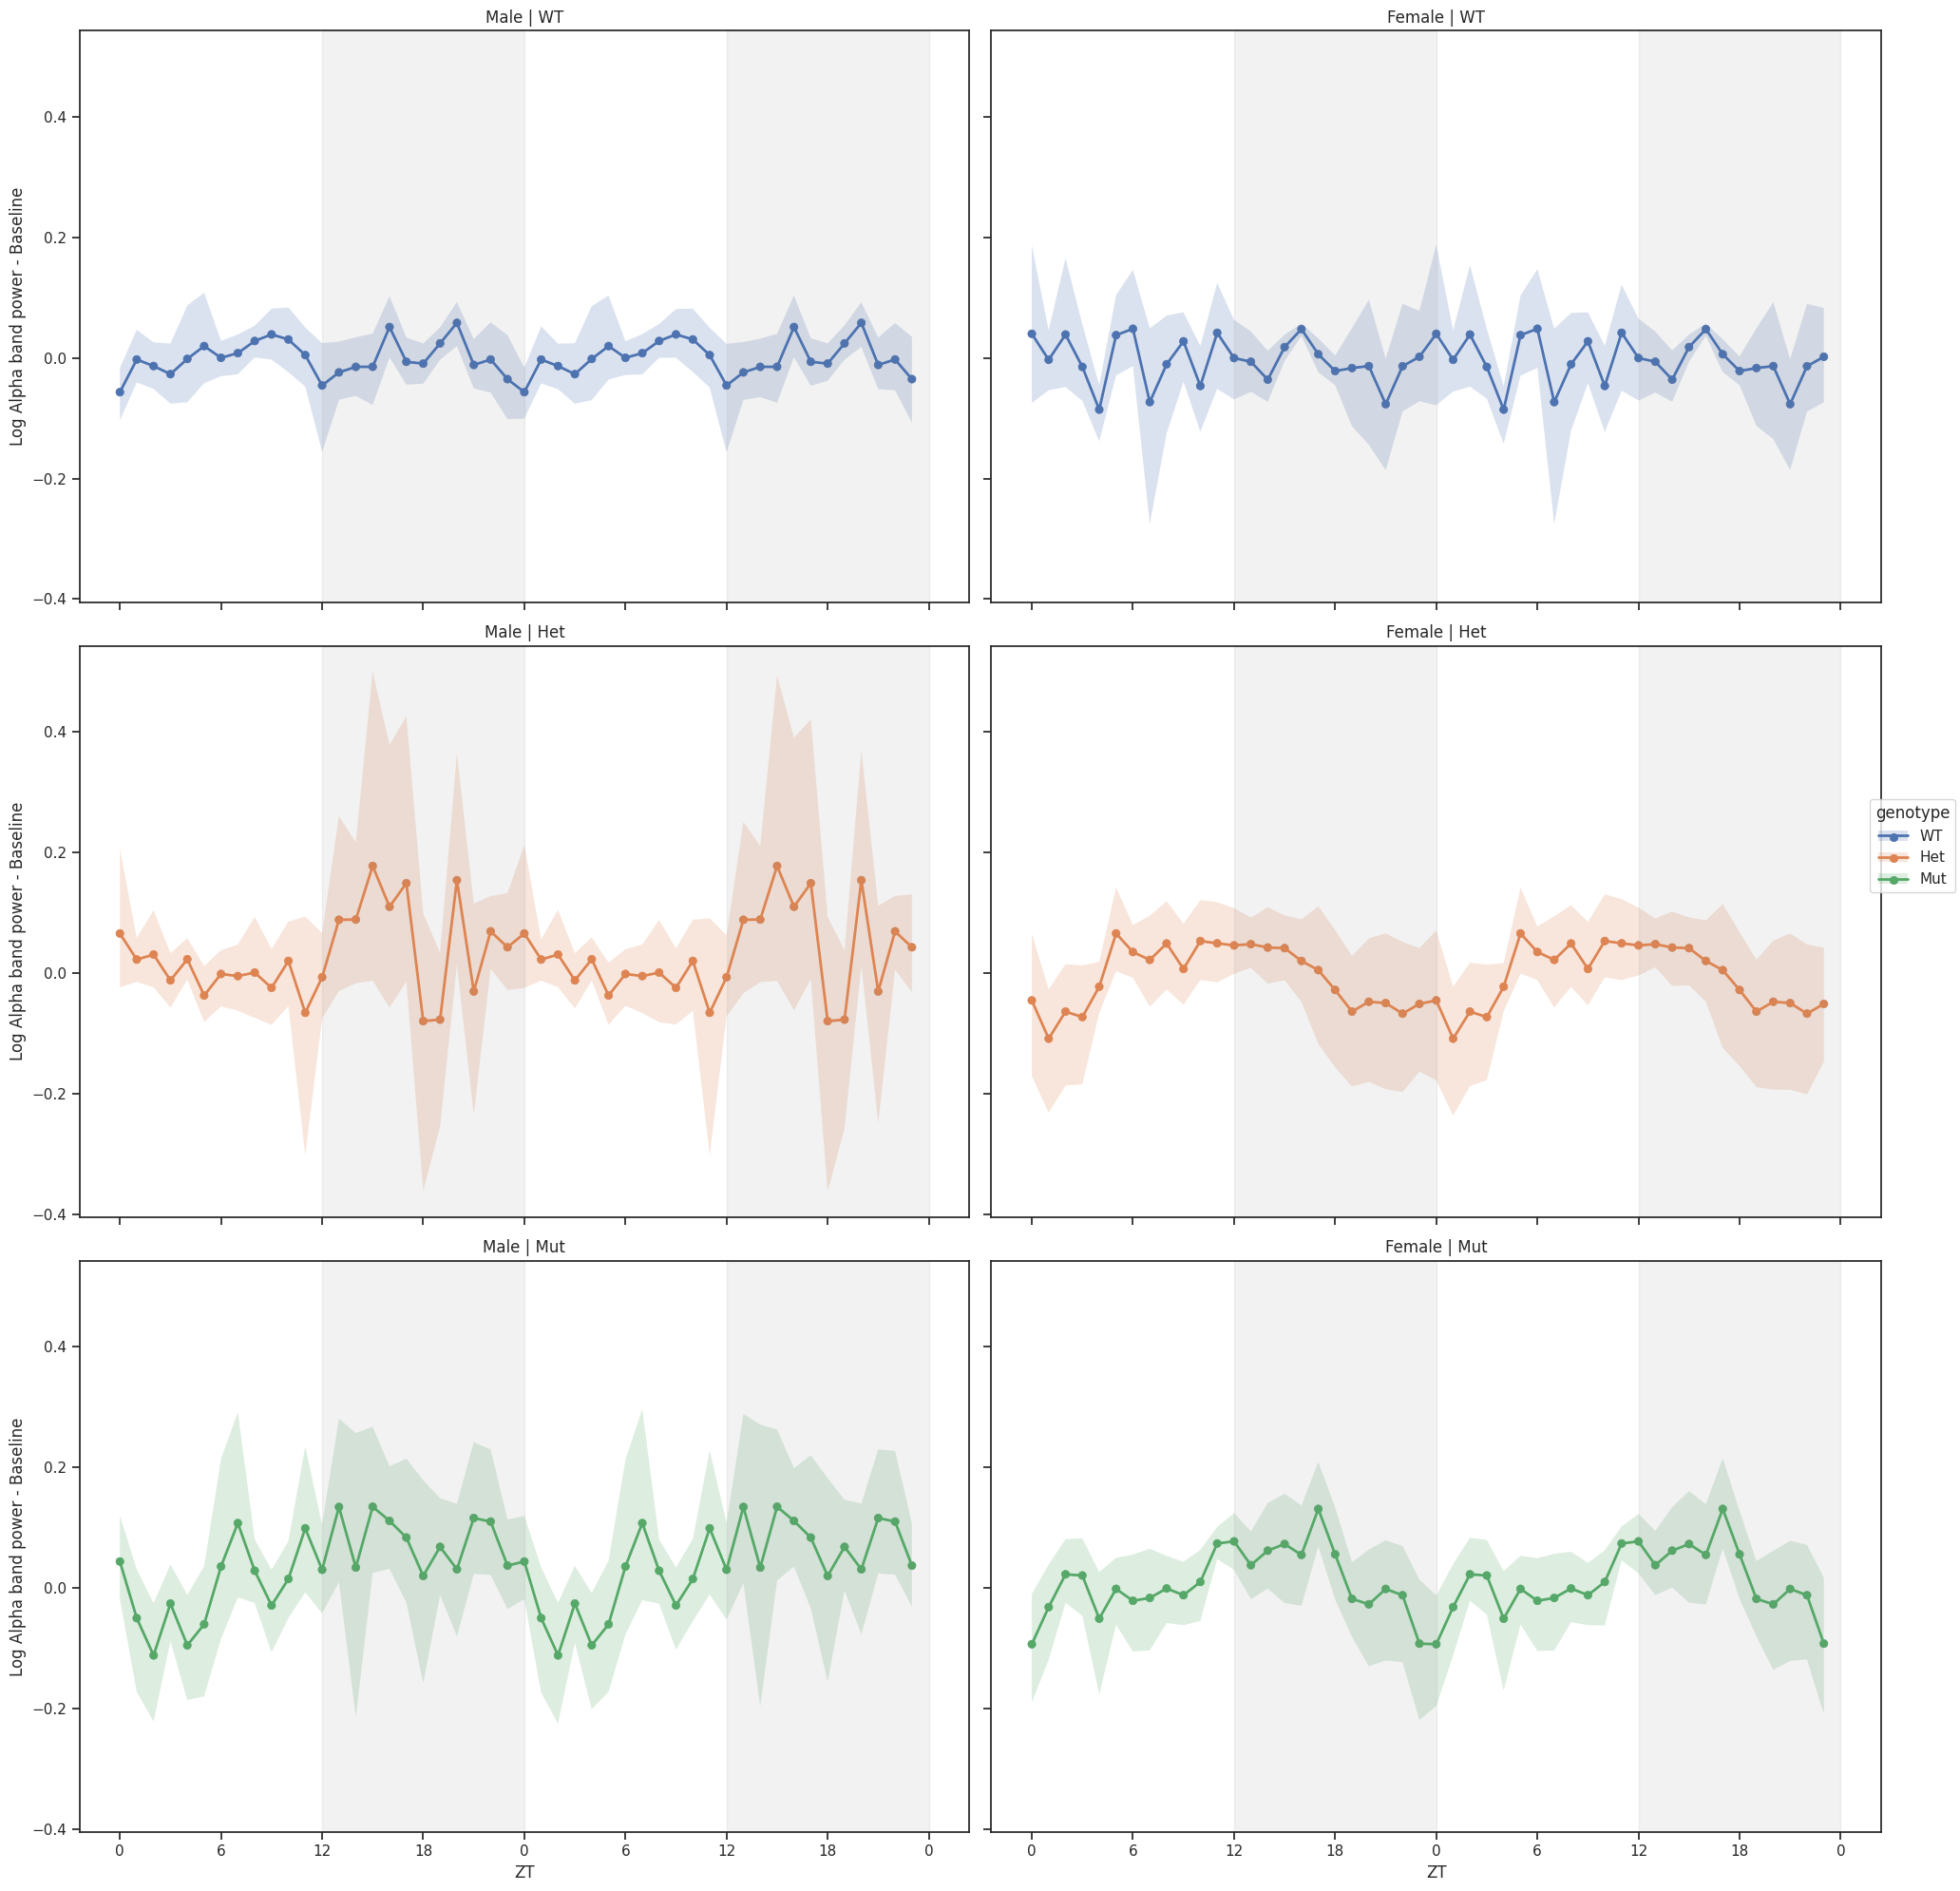

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


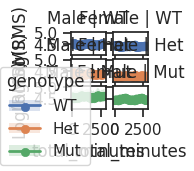

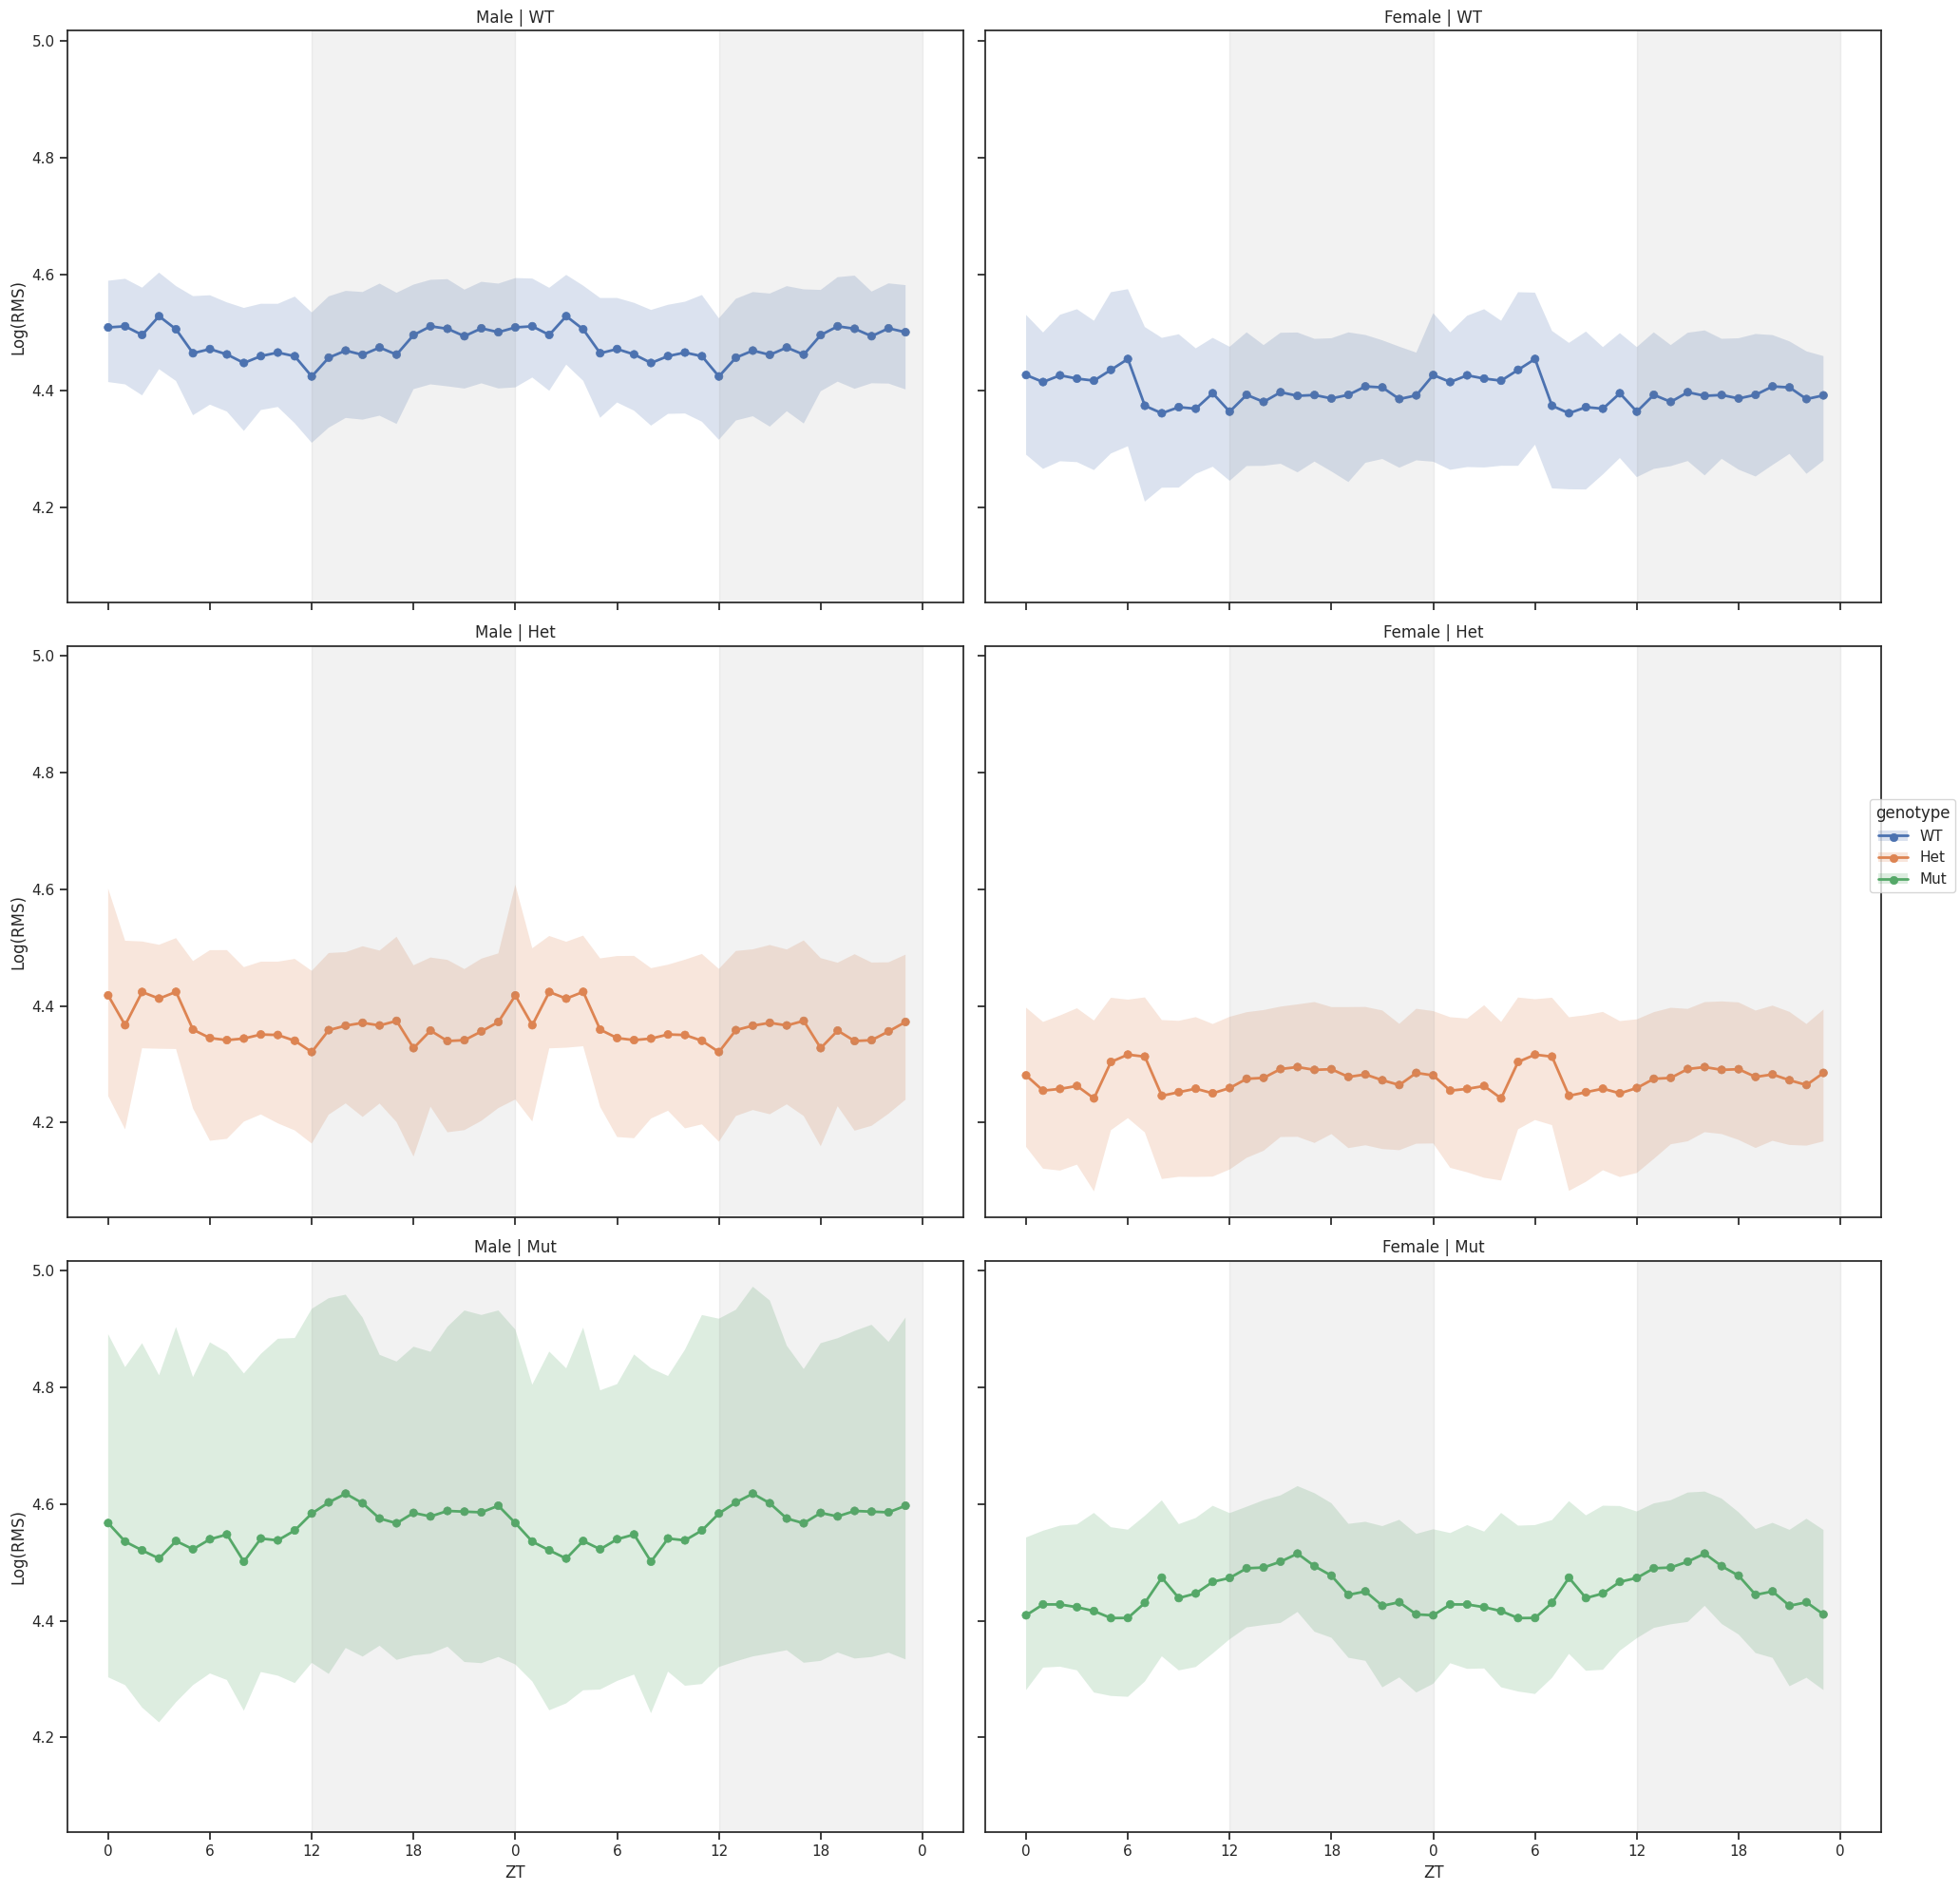

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


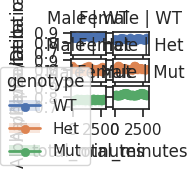

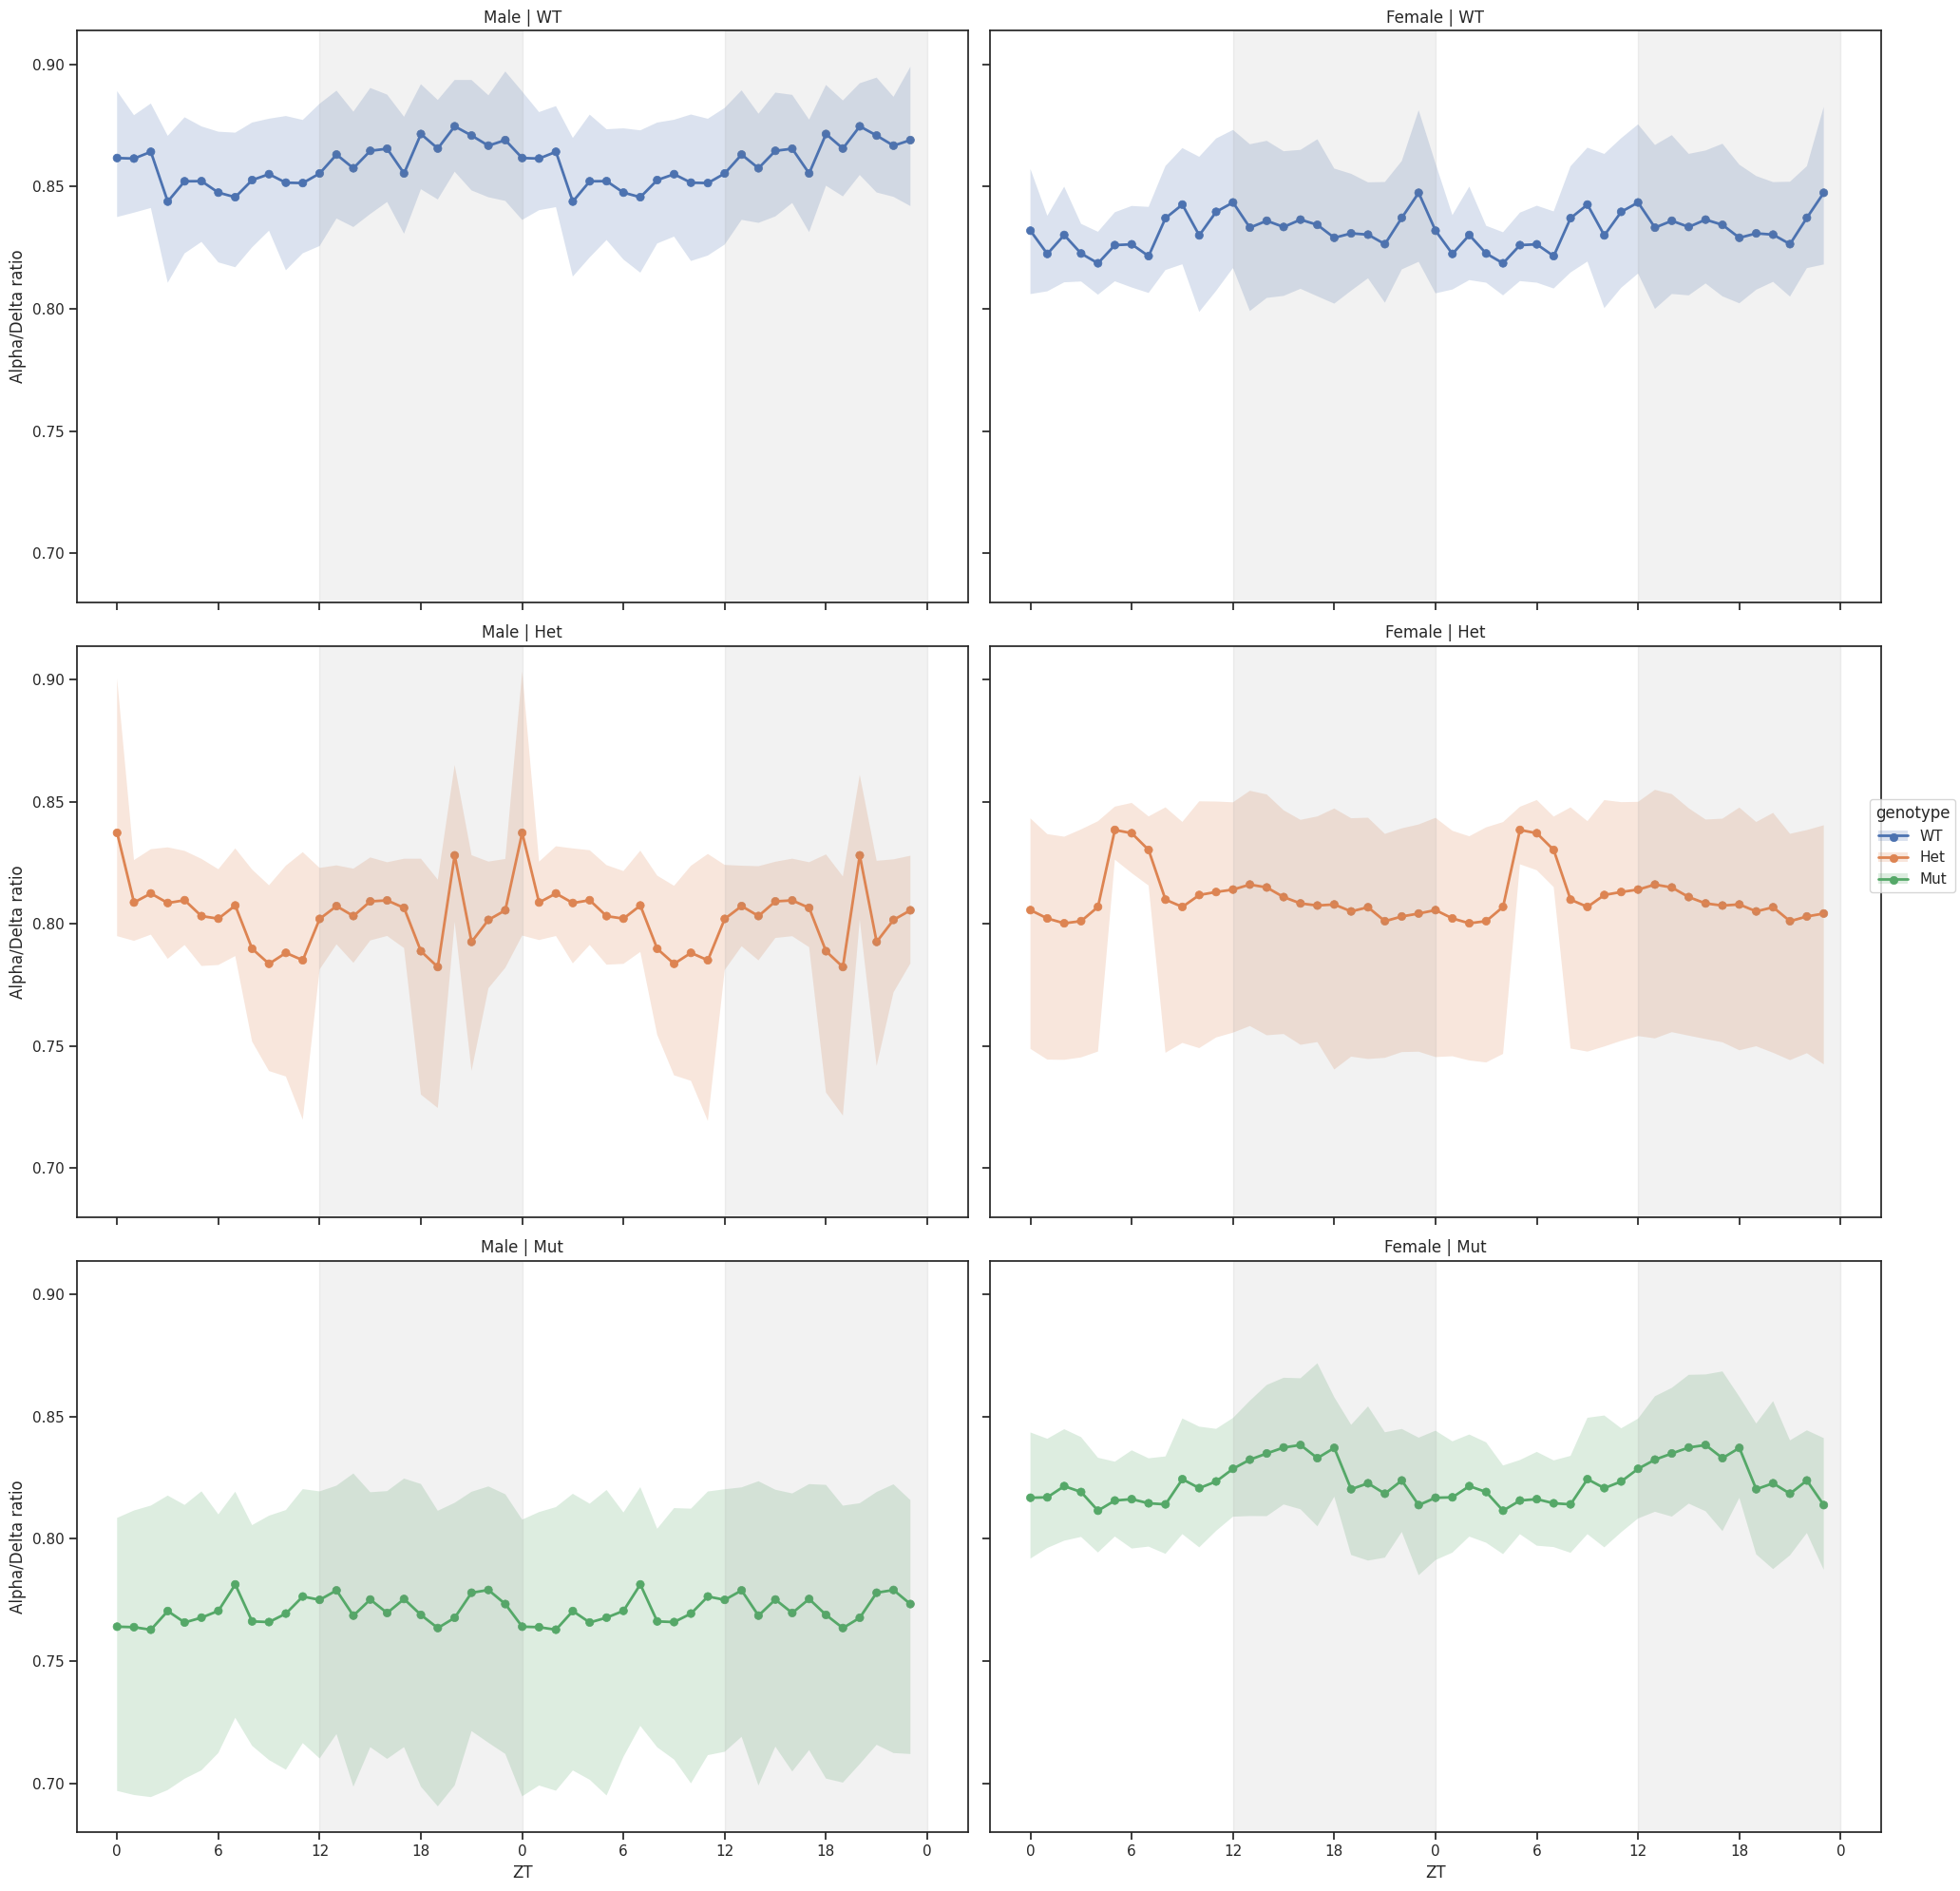

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


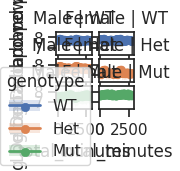

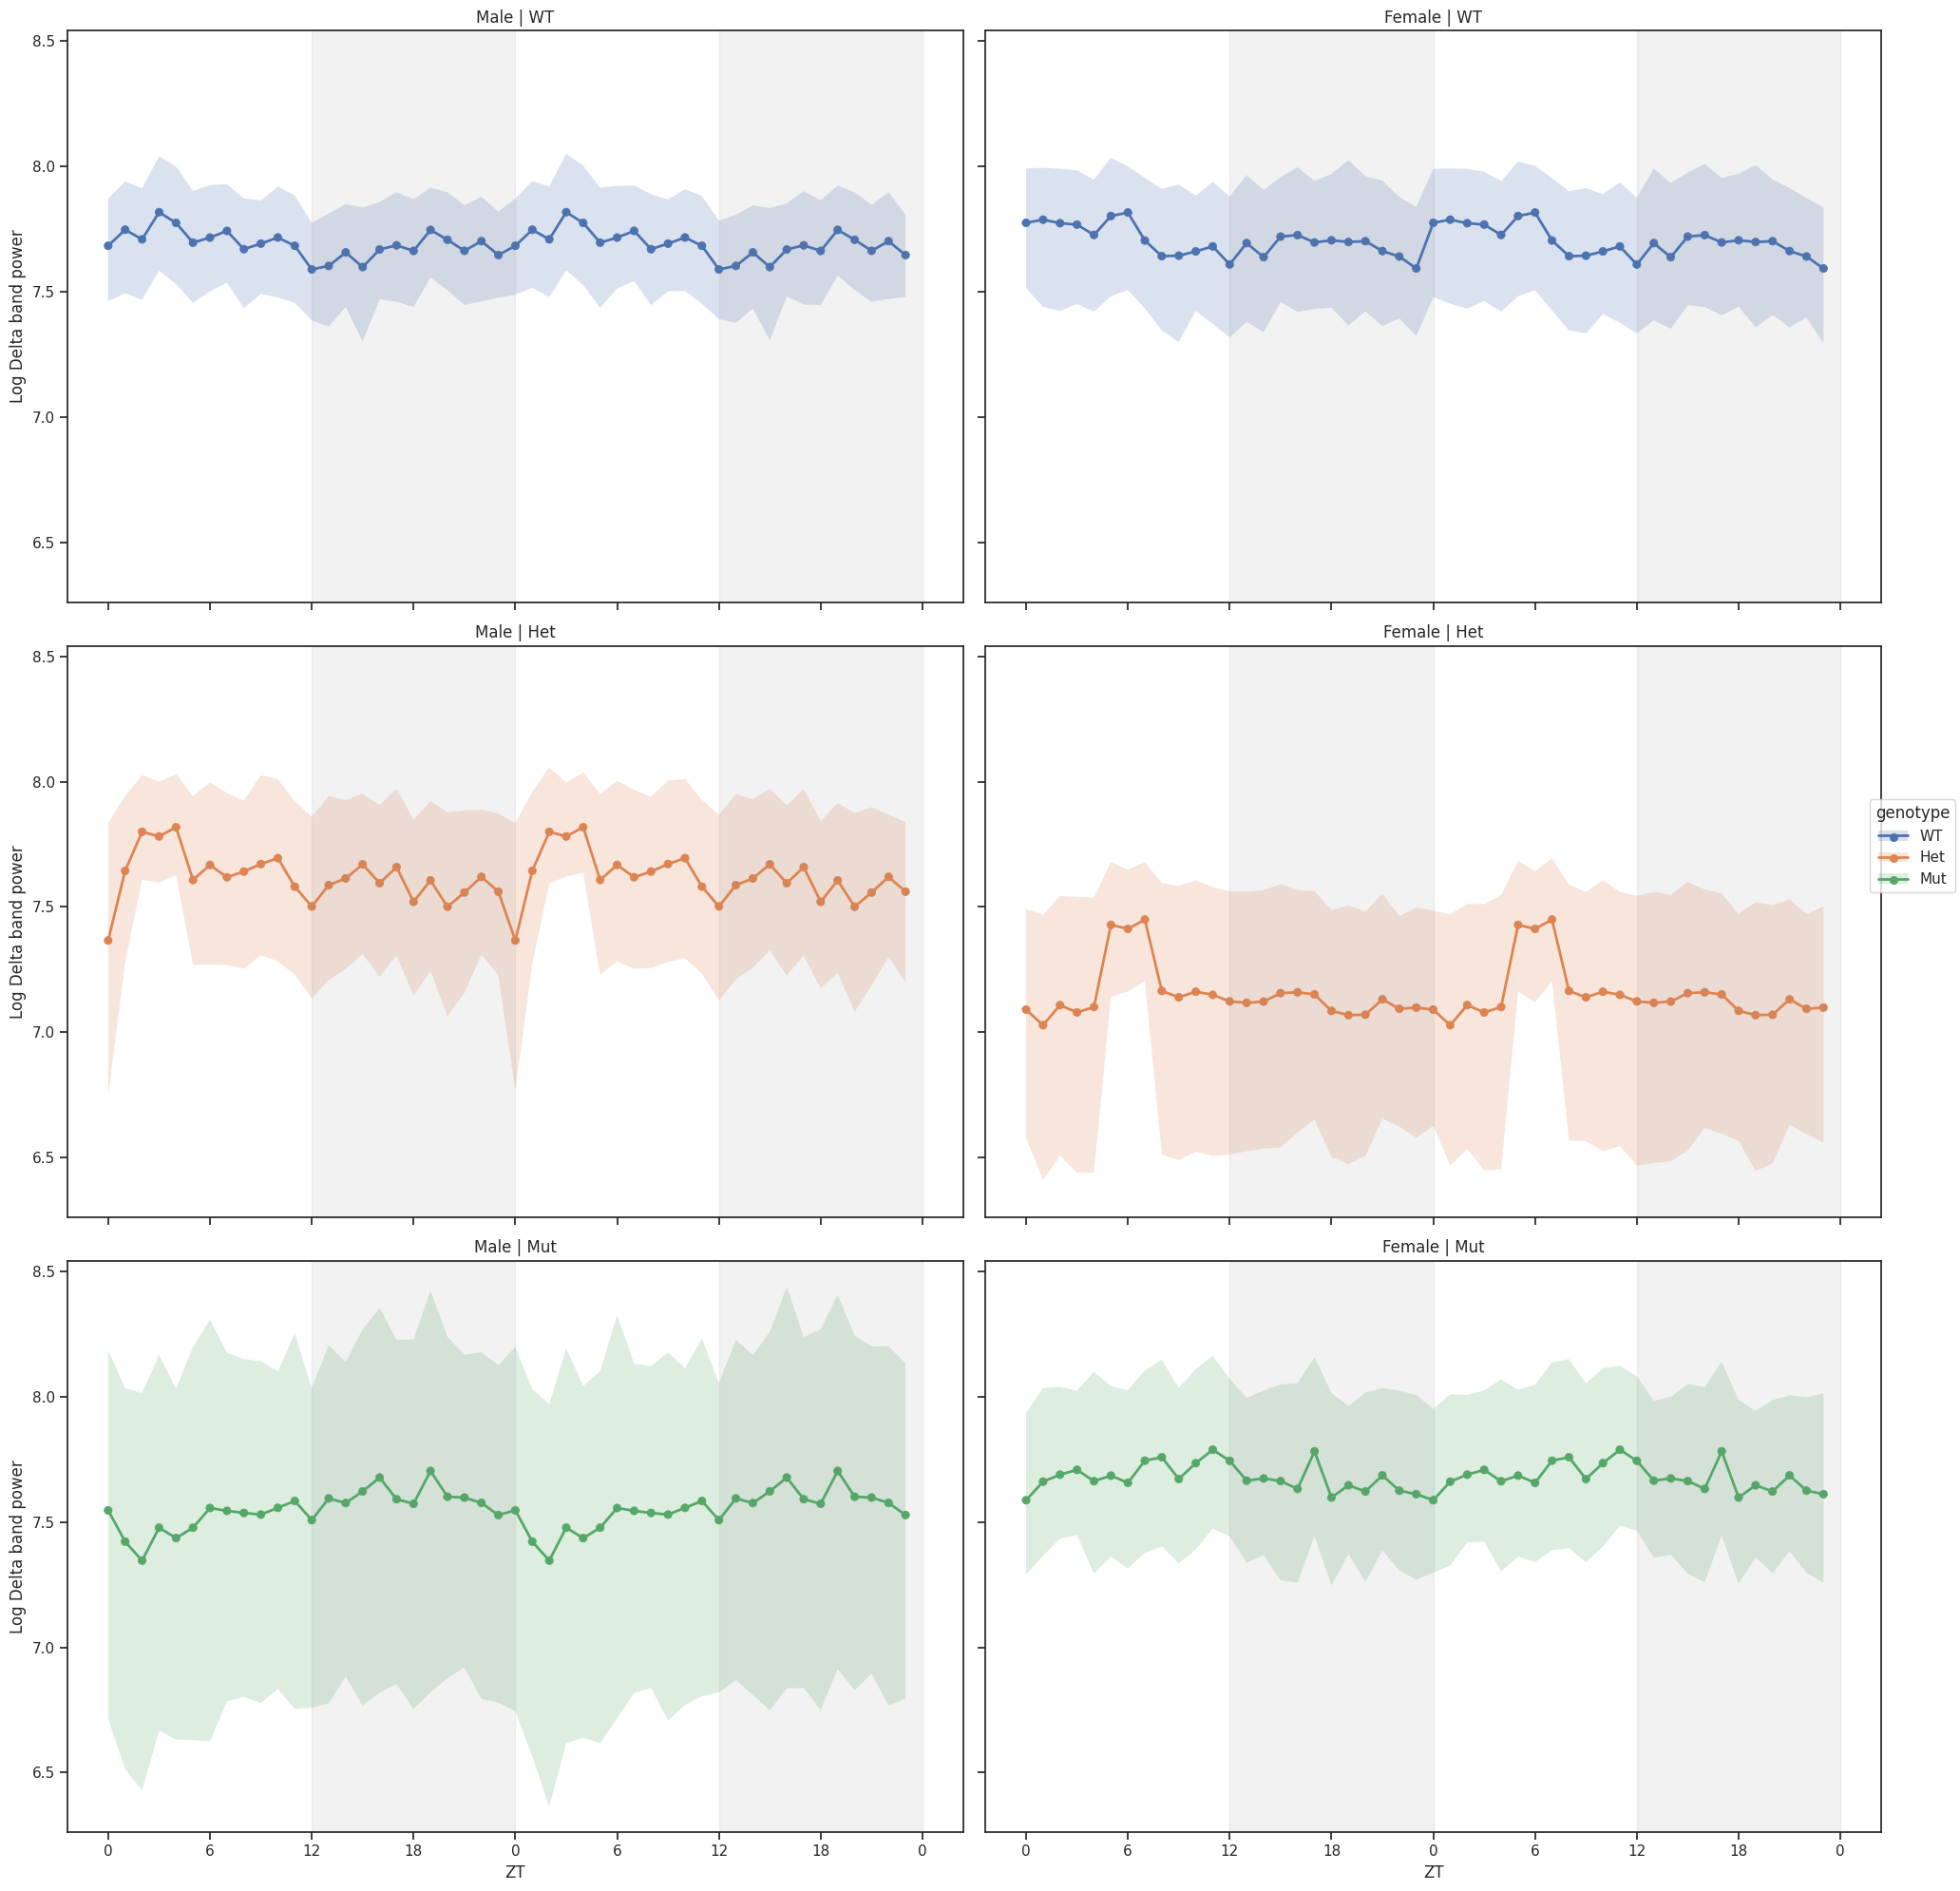

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


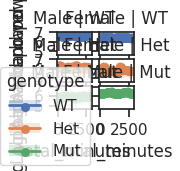

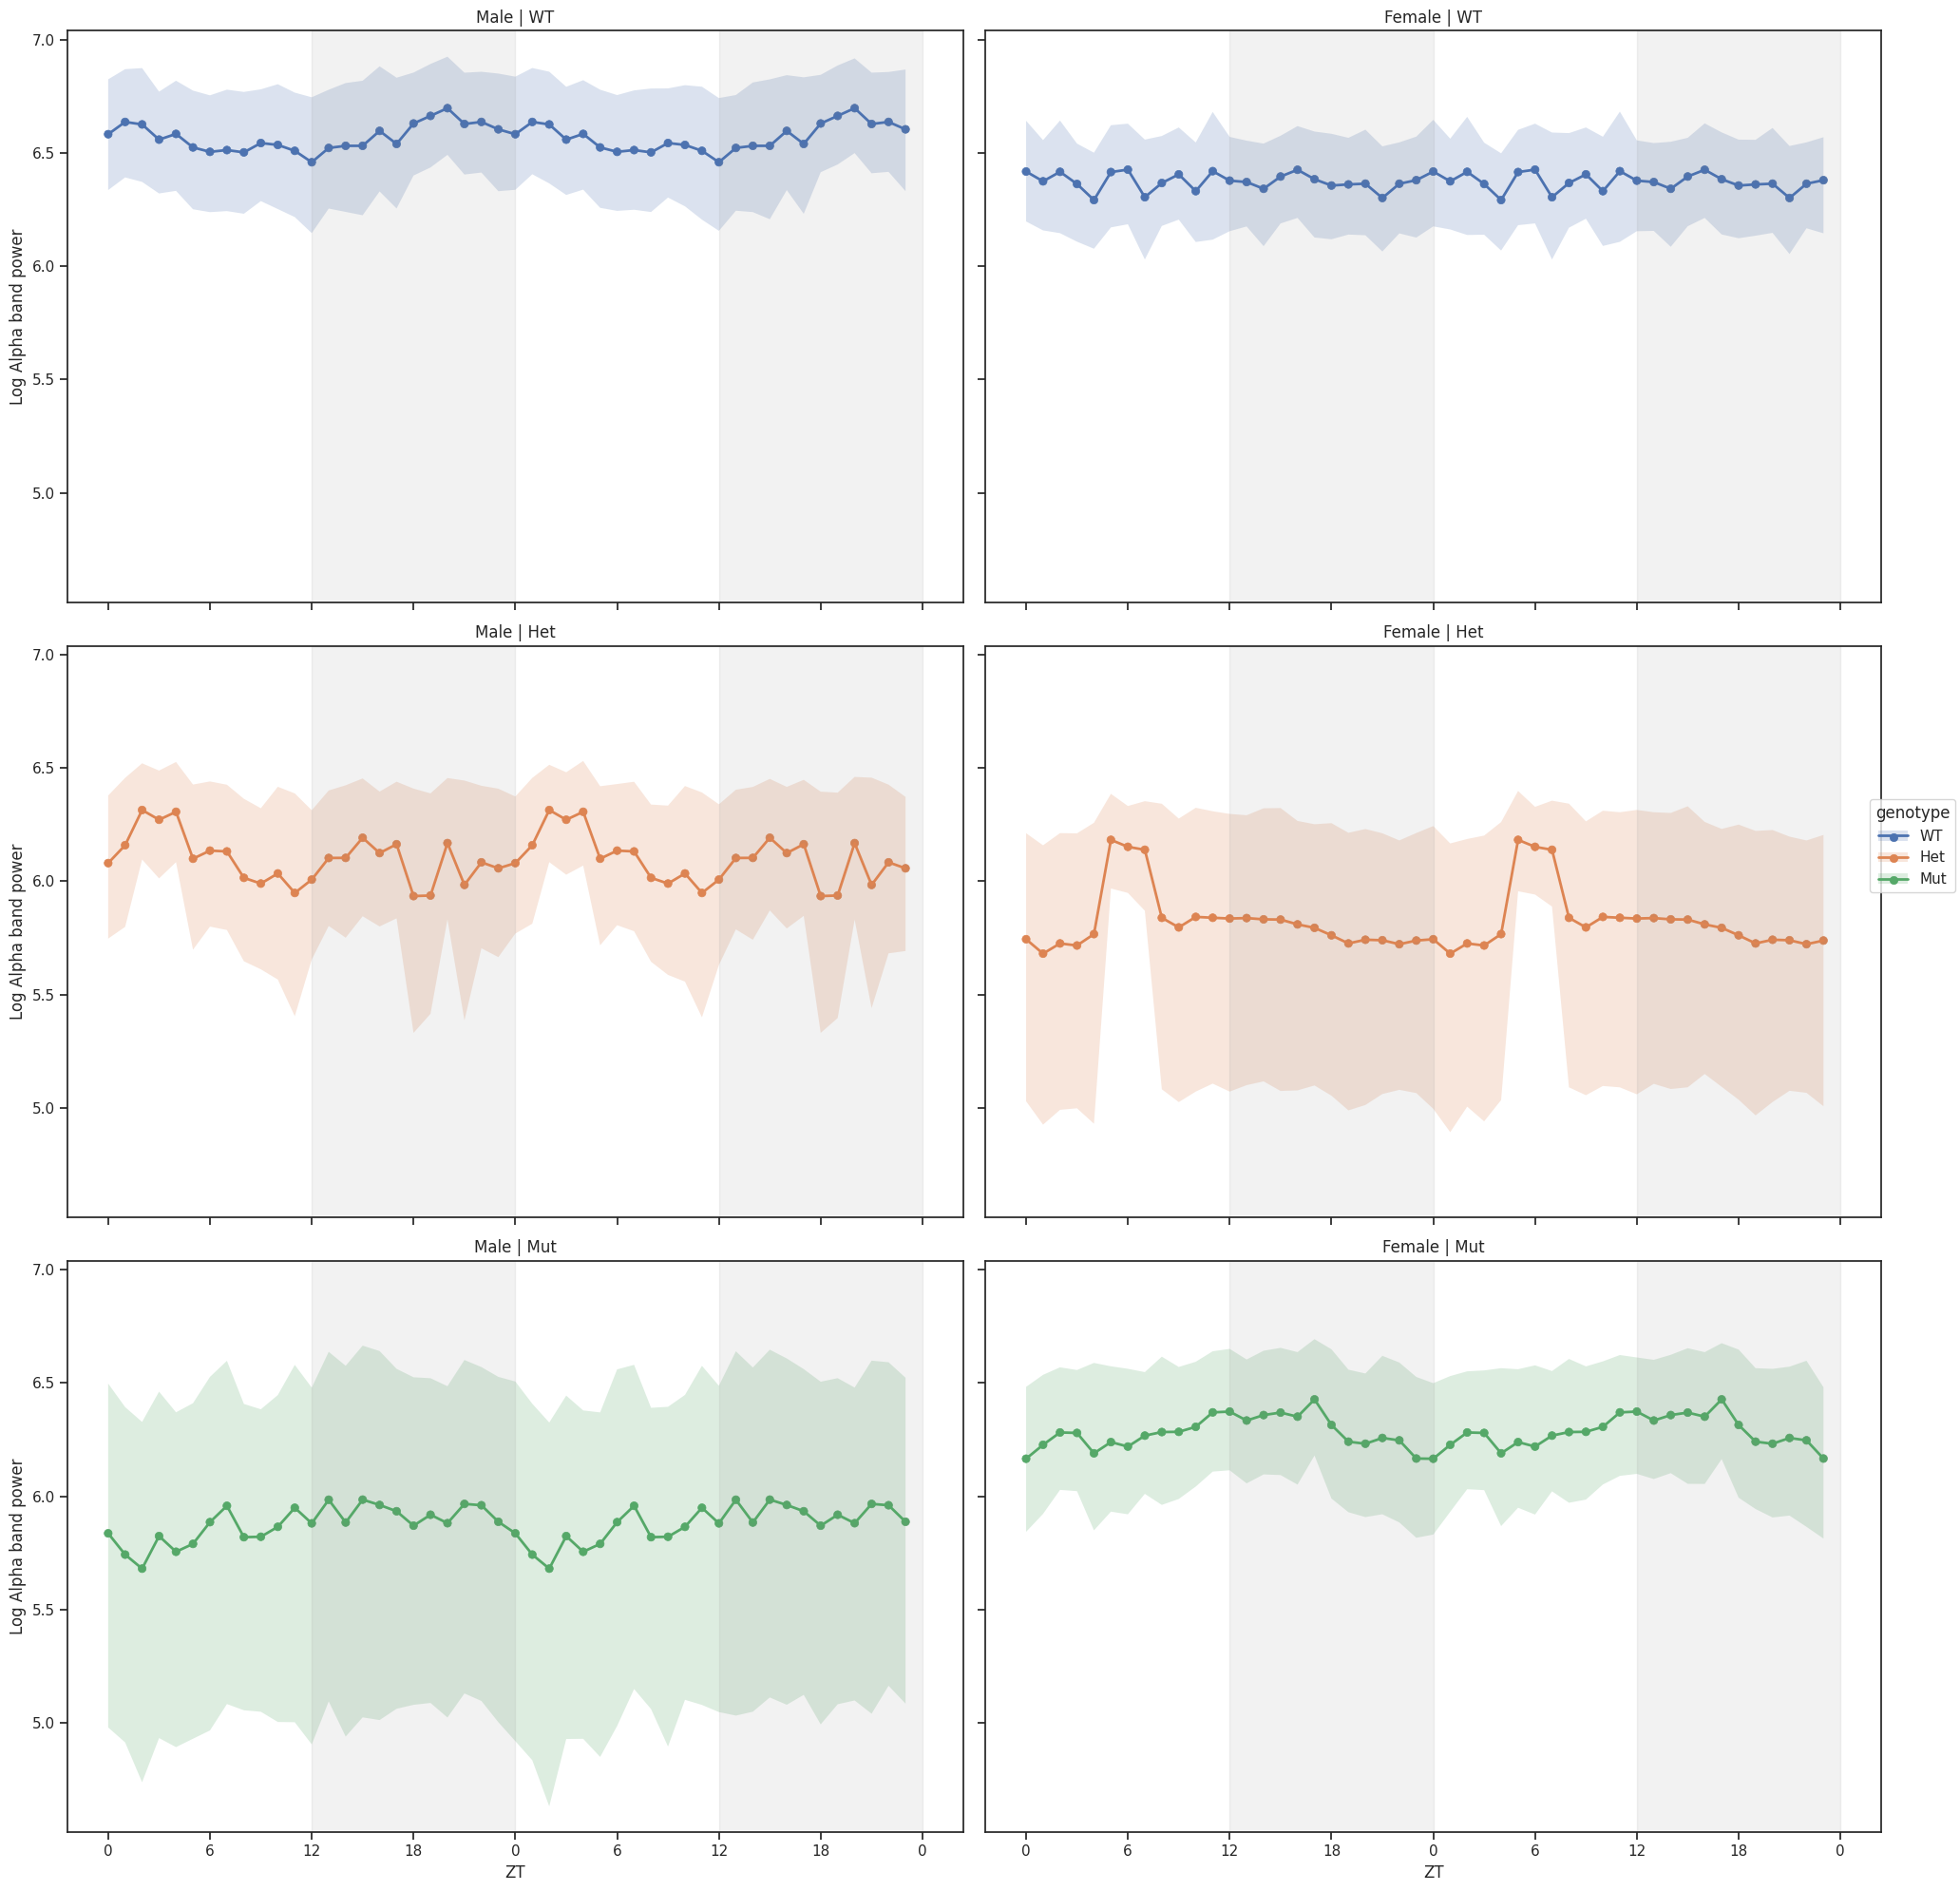

In [10]:
import matplotlib as mpl

features = ['zpcorr', 'zpcorr_nobase', 'logrms_nobase', 'alphadelta_nobase', 'delta_nobase', 'alpha_nobase', 'logrms', 'alphadelta', 'delta', 'alpha']

for i, feature in enumerate(features):
    p = (  # fmt: off
        so.Plot(df, x="total_minutes", y=feature, color='genotype')  # fmt: off
        .facet(col='sex', row='genotype')
        .add(so.Line(linewidth=2), so.Agg())
        .add(so.Dot(), so.Agg())
        .add(so.Band(), so.Est())
        # .add(so.Lines(linewidth=1, alpha=0.8), group='animal')
        # .add(
        #         so.Text(valign="center", fontsize=5),
        #         so.Agg(),
        #         text="animal",
        #     )
        .layout(size=(1, 1)) 
        .theme(axes_style("ticks"))
        .label(y=feature_to_label[feature])
    )
    fig = mpl.figure.Figure(figsize=(20, 20))
    # fig = mpl.figure.Figure(figsize=(8, 5))
    p.show()
    p.on(fig).plot()
    for ax in fig.axes:
        # ax.axvspan(xmin=0, xmax=6 * 60, alpha=0.1, color='grey')
        ax.axvspan(xmin=12 * 60, xmax=24 * 60, alpha=0.1, color='grey')
        ax.axvspan(xmin=36 * 60, xmax=48 * 60, alpha=0.1, color='grey')

        # Set ticks every 12 hours (12 * 60 minutes)
        ax.set_xticks(np.arange(0, 49 * 60, 6 * 60))
        new_labels = [(x/60) % 24 for x in ax.get_xticks()]
        ax.set_xticklabels([f"{x:.0f}" for x in new_labels])
        ax.set_xlabel("ZT")

    fig.tight_layout()
    display(fig)
    fig.savefig(save_folder / f"{i}_{feature}.png")
    plt.close()

In [10]:
raise Exception('stop')

Exception: stop

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


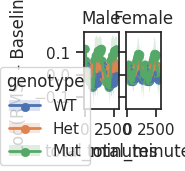

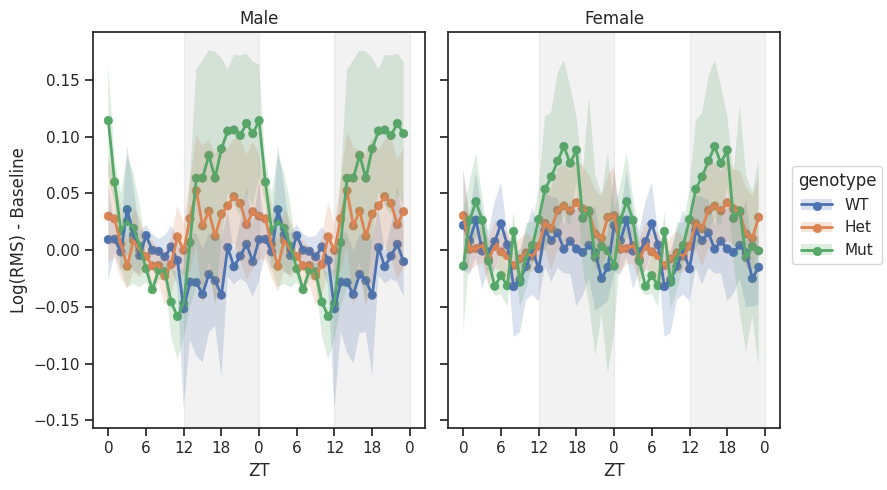

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


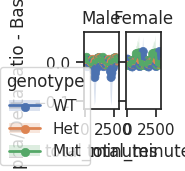

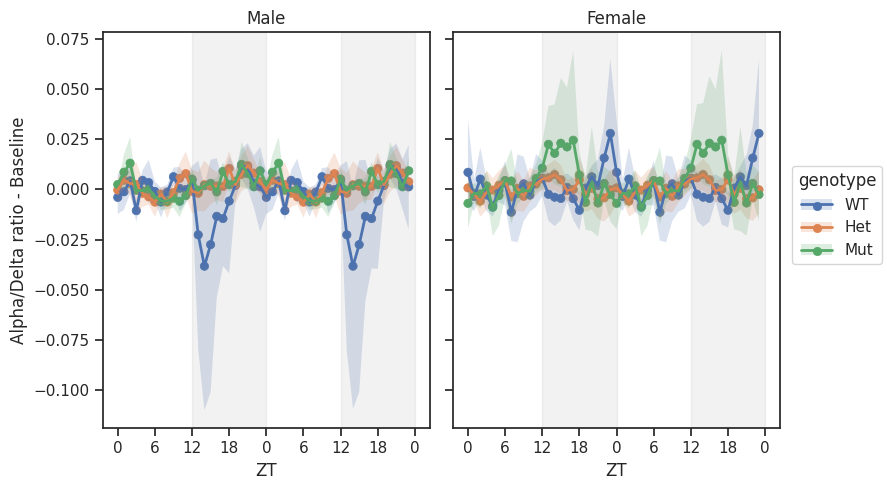

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


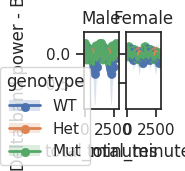

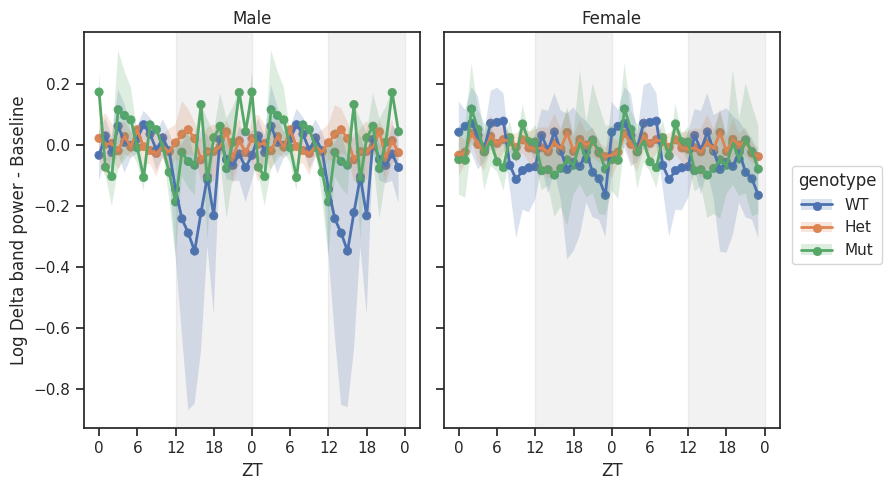

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


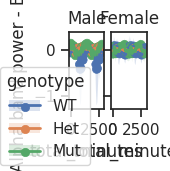

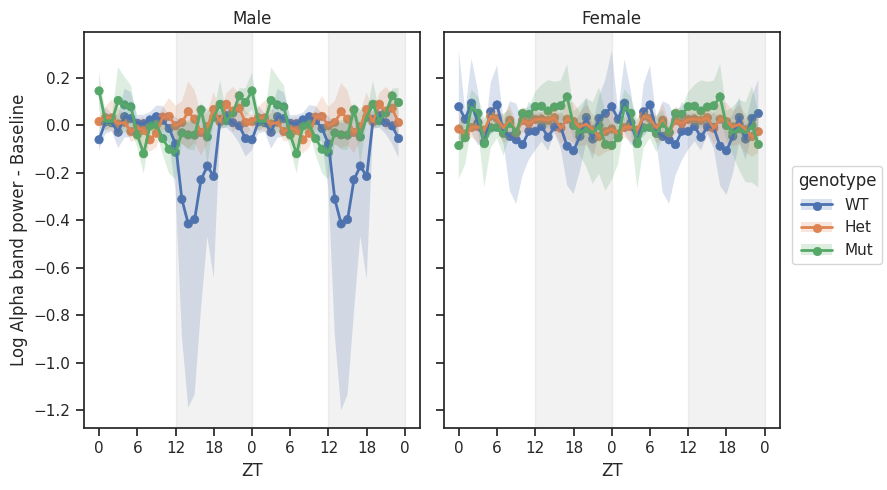

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


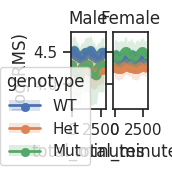

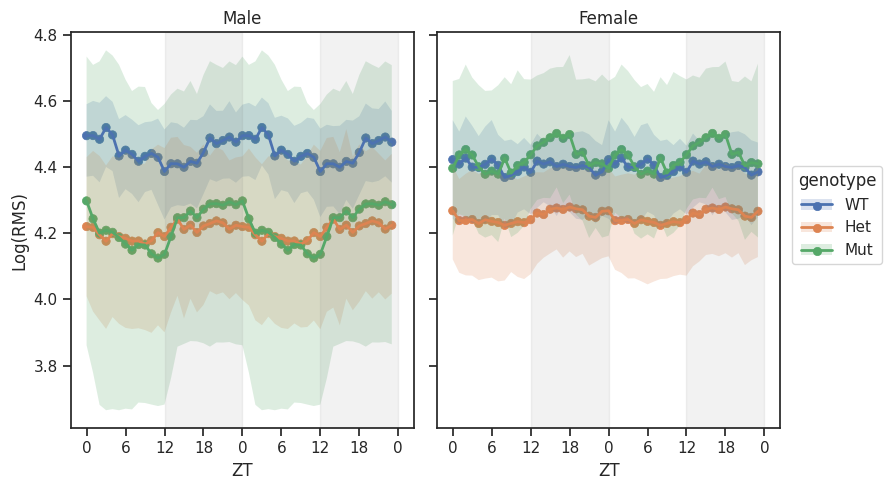

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


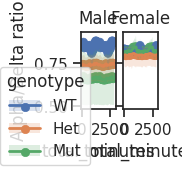

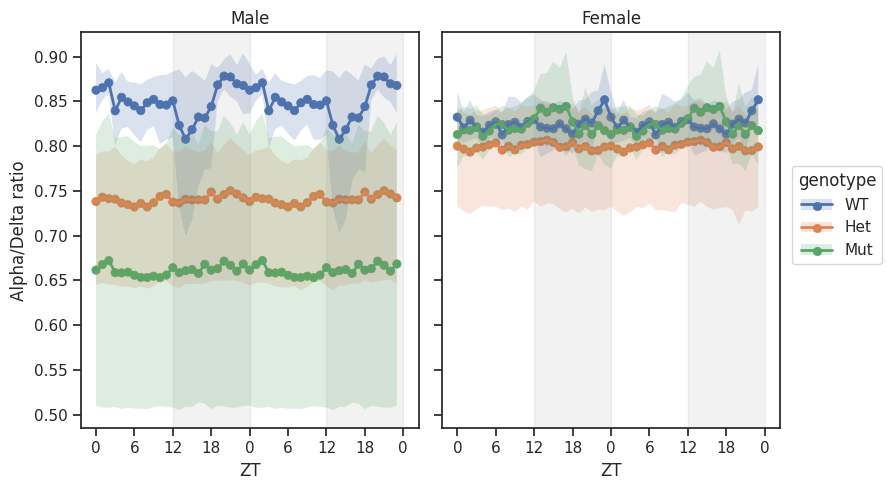

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


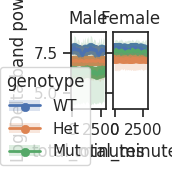

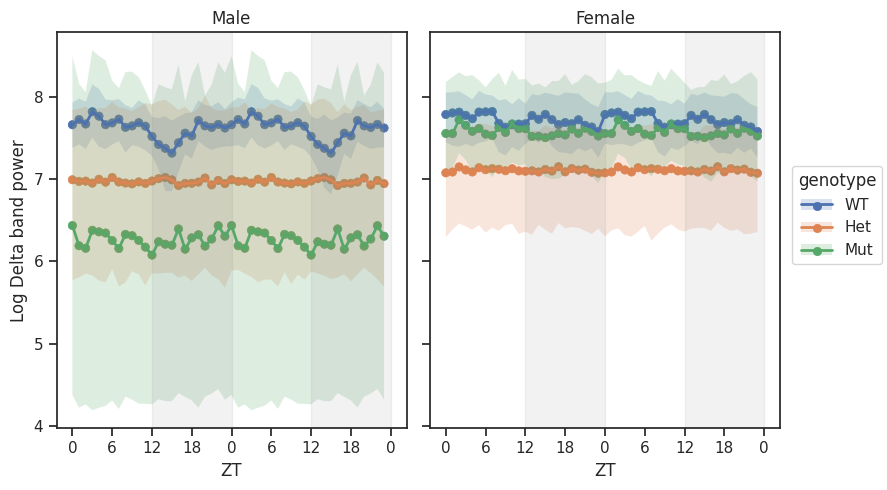

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


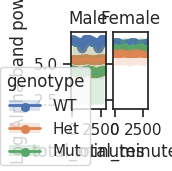

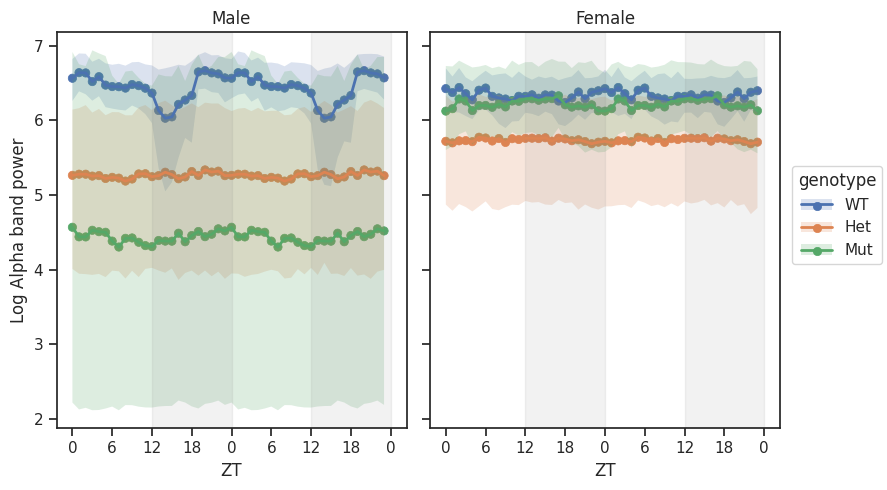

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


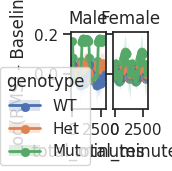

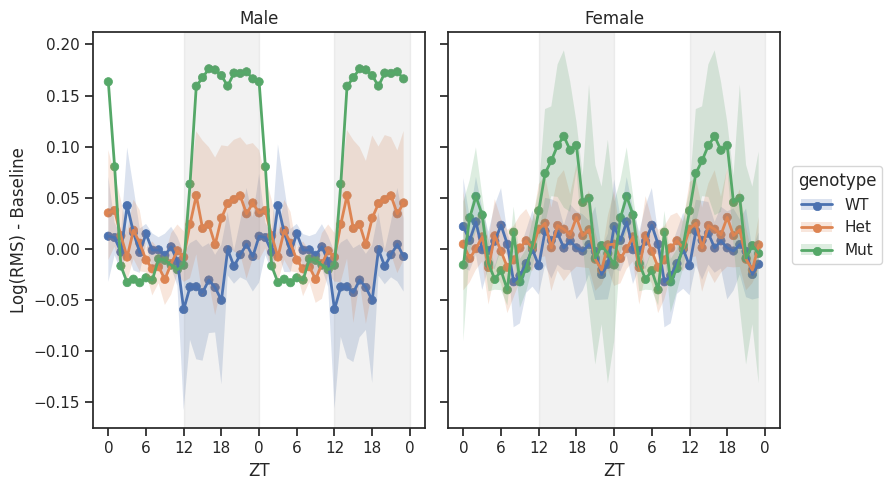

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


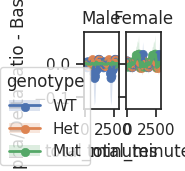

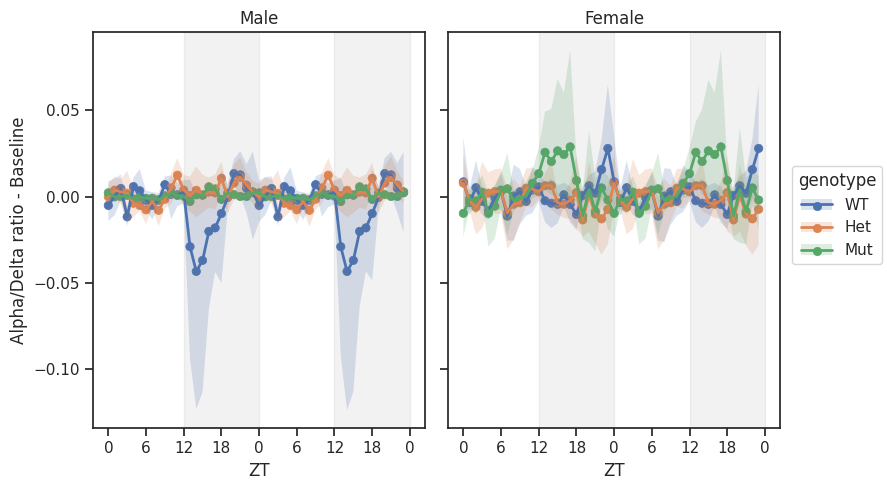

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


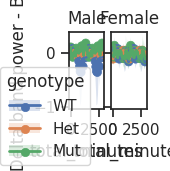

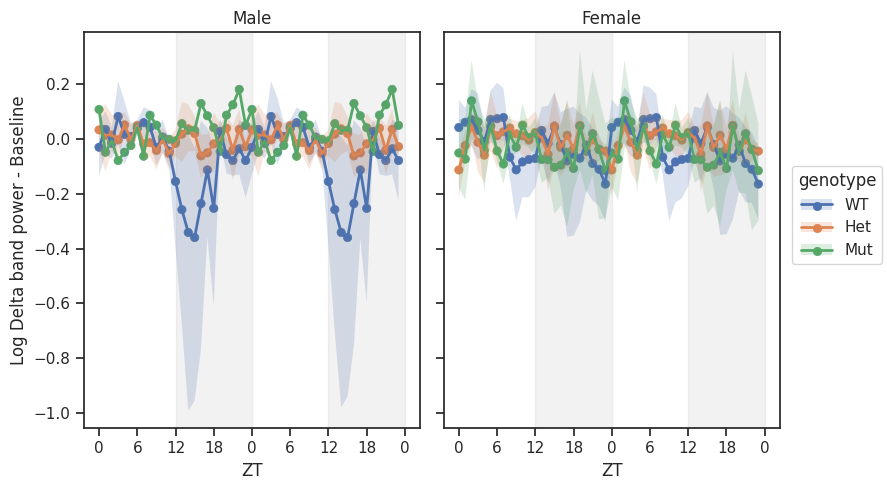

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


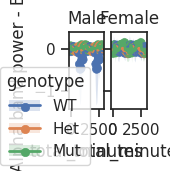

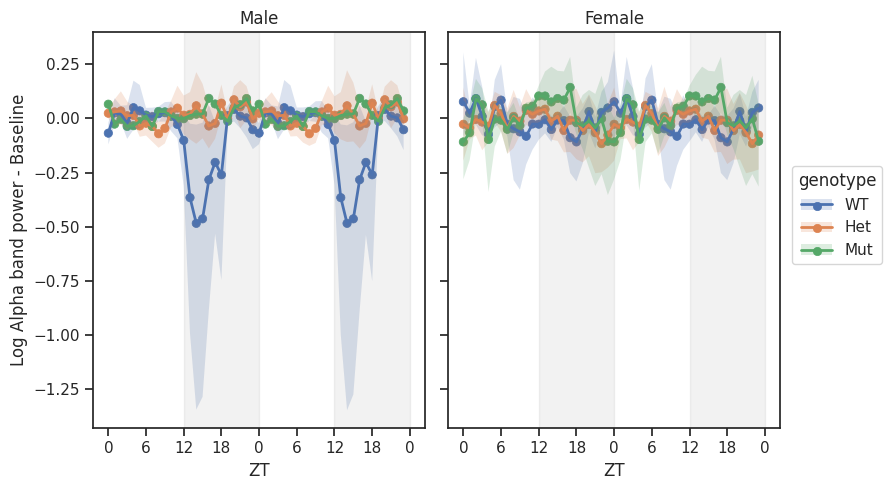

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


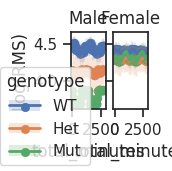

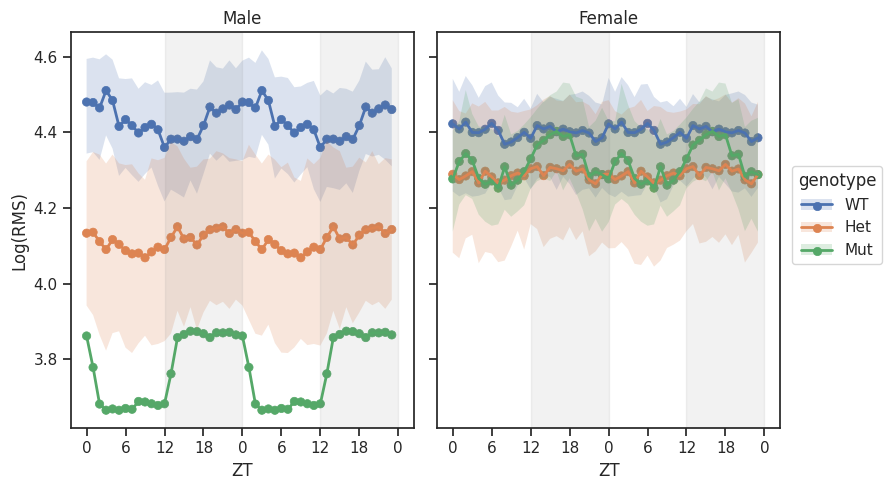

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


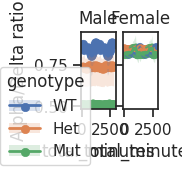

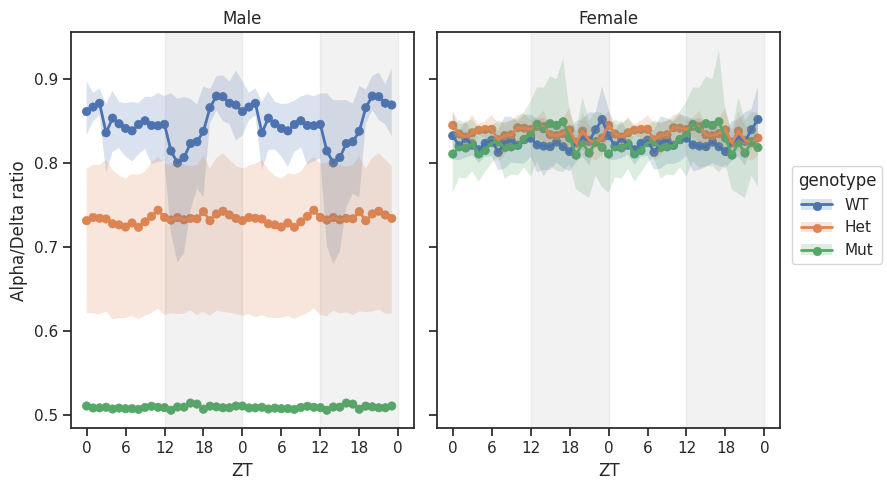

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


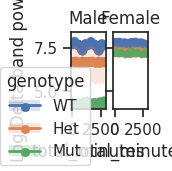

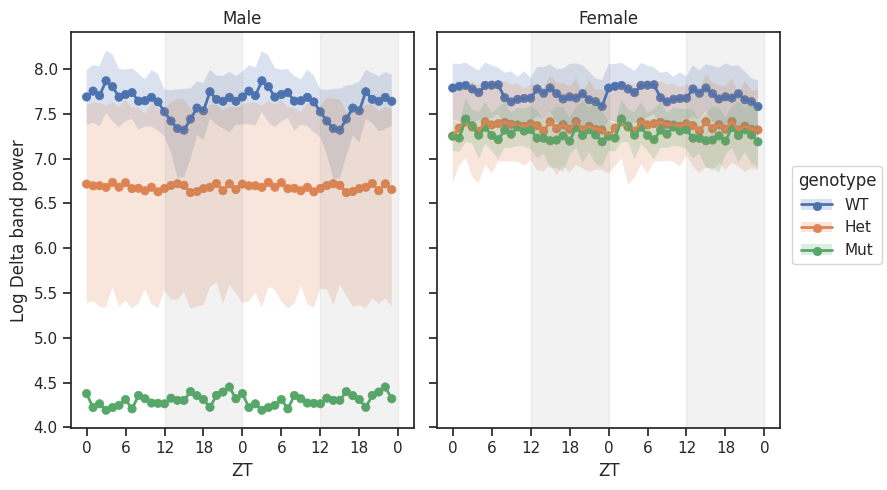

/mnt/isilon/marsh_single_unit/PythonEEG/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


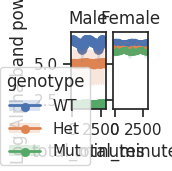

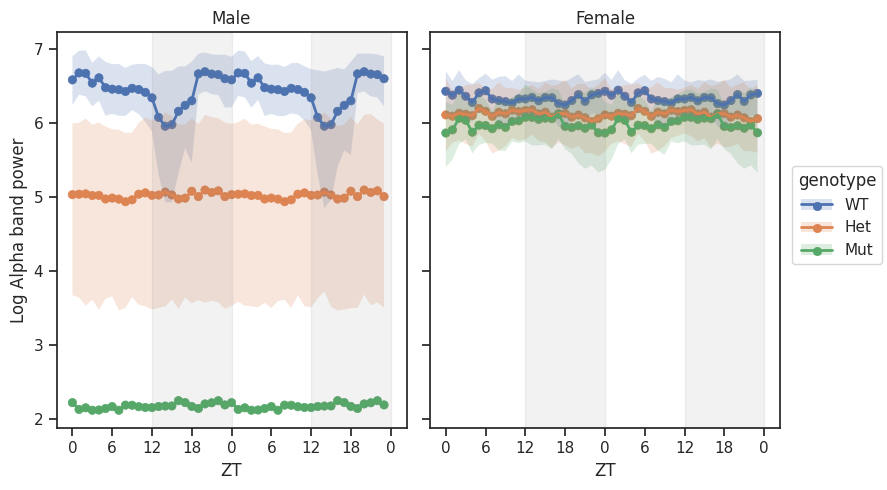